# Proyecto Contaminación

# Dynamic Time Wraping (DTW) para la comparación del curso de contaminantes y egresos

# Contaminante PM10

# (Año 2010)

In [1]:
# Se van a agrupar los registros del contaminante en semanas

# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante = 'PM10'
# Se declaran las columnas a extraer de la base de datos
columns = ['timestamp', contaminante]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante = pd.read_csv('filled.csv', usecols=columns).dropna()
# Se convierten los strings a objeto datetime
strfdt = '%d-%b-%y %H'
dataframecontaminante['timestamp'] = pd.to_datetime(dataframecontaminante['timestamp'], errors = 'coerce', format=strfdt)
# Se eliminan los espacios vacios
dataframecontaminante = dataframecontaminante.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante = dataframecontaminante.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante

timestamp   PM10
0       1993-01-01 00:00:00   41.0
1       1993-01-01 00:00:00   30.5
2       1993-01-01 00:00:00   60.0
3       1993-01-01 00:00:00   38.5
4       1993-01-01 01:00:00   41.0
...                     ...    ...
1382706 2018-12-31 23:00:00  445.0
1382707 2018-12-31 23:00:00  134.0
1382708 2018-12-31 23:00:00  392.0
1382709 2018-12-31 23:00:00   40.0
1382710 2018-12-31 23:00:00  103.0

[1382711 rows x 2 columns]

In [2]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante['timestamp'] = dataframecontaminante['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante

timestamp   PM10
0        1993-01-01 00   41.0
1        1993-01-01 00   30.5
2        1993-01-01 00   60.0
3        1993-01-01 00   38.5
4        1993-01-01 01   41.0
...                ...    ...
1382706  2018-12-31 23  445.0
1382707  2018-12-31 23  134.0
1382708  2018-12-31 23  392.0
1382709  2018-12-31 23   40.0
1382710  2018-12-31 23  103.0

[1382711 rows x 2 columns]

In [3]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2010'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   PM10
0      2010-01-01 00   44.0
1      2010-01-01 00  114.0
2      2010-01-01 00   41.0
3      2010-01-01 00   38.0
4      2010-01-01 00   40.0
...              ...    ...
57985  2010-12-31 23   71.0
57986  2010-12-31 23  381.0
57987  2010-12-31 23  185.0
57988  2010-12-31 23  154.0
57989  2010-12-31 23  115.0

[57990 rows x 2 columns]

In [4]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   PM10
0     2010-01-01 00:00:00   44.0
1     2010-01-01 00:00:00  114.0
2     2010-01-01 00:00:00   41.0
3     2010-01-01 00:00:00   38.0
4     2010-01-01 00:00:00   40.0
...                   ...    ...
57985 2010-12-31 23:00:00   71.0
57986 2010-12-31 23:00:00  381.0
57987 2010-12-31 23:00:00  185.0
57988 2010-12-31 23:00:00  154.0
57989 2010-12-31 23:00:00  115.0

[57990 rows x 2 columns]

In [5]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   PM10  sem
0     2010-01-01 00:00:00   44.0   52
1     2010-01-01 00:00:00  114.0   52
2     2010-01-01 00:00:00   41.0   52
3     2010-01-01 00:00:00   38.0   52
4     2010-01-01 00:00:00   40.0   52
...                   ...    ...  ...
57985 2010-12-31 23:00:00   71.0   52
57986 2010-12-31 23:00:00  381.0   52
57987 2010-12-31 23:00:00  185.0   52
57988 2010-12-31 23:00:00  154.0   52
57989 2010-12-31 23:00:00  115.0   52

[57990 rows x 3 columns]

In [6]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        19/01/2010     O829
1        16/02/2010     J189
2        23/03/2010     N814
3        17/04/2010     O759
4        22/05/2010     K359
...             ...      ...
2634334  21/07/2010     O064
2634335  21/05/2010     S822
2634336  23/03/2010     K802
2634337  17/08/2010     O809
2634338  21/12/2010     C629

[2634339 rows x 2 columns]

In [7]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2010-01-19     O829    3
1       2010-02-16     J189    7
2       2010-03-23     N814   12
3       2010-04-17     O759   15
4       2010-05-22     K359   20
...            ...      ...  ...
2597279 2010-07-21     O064   29
2597280 2010-05-21     S822   20
2597281 2010-03-23     K802   12
2597282 2010-08-17     O809   33
2597283 2010-12-21     C629   51

[2597284 rows x 3 columns]

In [8]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     43463
2     48020
3     49300
4     50404
5     46716
6     50279
7     49462
8     50102
9     51123
10    52219
11    48527
12    51158
13    46652
14    48200
15    49187
16    49499
17    51348
18    48072
19    50004
20    50627
21    51101
22    51157
23    51436
24    49970
25    49757
26    49682
27    50141
28    50981
29    50164
30    50925
31    51991
32    52355
33    52240
34    53192
35    54220
36    55165
37    48947
38    54466
39    54926
40    54540
41    54019
42    54255
43    52924
44    47914
45    52907
46    50233
47    52802
48    51769
49    51864
50    51110
51    47295
52     8474
Name: sem, dtype: int64

In [9]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem     PM10
0     1  45.9991
1     2  41.8279
2     3  100.508
3     4   54.959
4     5  61.9318
5     6   55.659
6     7  53.6999
7     8  51.6396
8     9   49.824
9    10  70.9869
10   11  64.1664
11   12  74.9307
12   13  75.7219
13   14  83.4661
14   15  40.1034
15   16  62.1967
16   17  76.0638
17   18  84.4623
18   19  85.8885
19   20  73.1979
20   21  56.7252
21   22  81.8973
22   23    86.02
23   24  60.0571
24   25  57.8512
25   26  46.3395
26   27  43.8147
27   28  84.1411
28   29  54.4346
29   30  61.6591
30   31   70.976
31   32   77.184
32   33  70.2432
33   34  75.1101
34   35  57.8271
35   36  70.6393
36   37   54.526
37   38  44.3261
38   39  76.2459
39   40  70.1367
40   41  86.5835
41   42  90.5317
42   43  103.468
43   44   87.284
44   45   85.167
45   46  91.0984
46   47   113.23
47   48  126.631
48   49  116.677
49   50  101.709
50   51  105.782
51   52  87.2595


2010

PM10 & O809


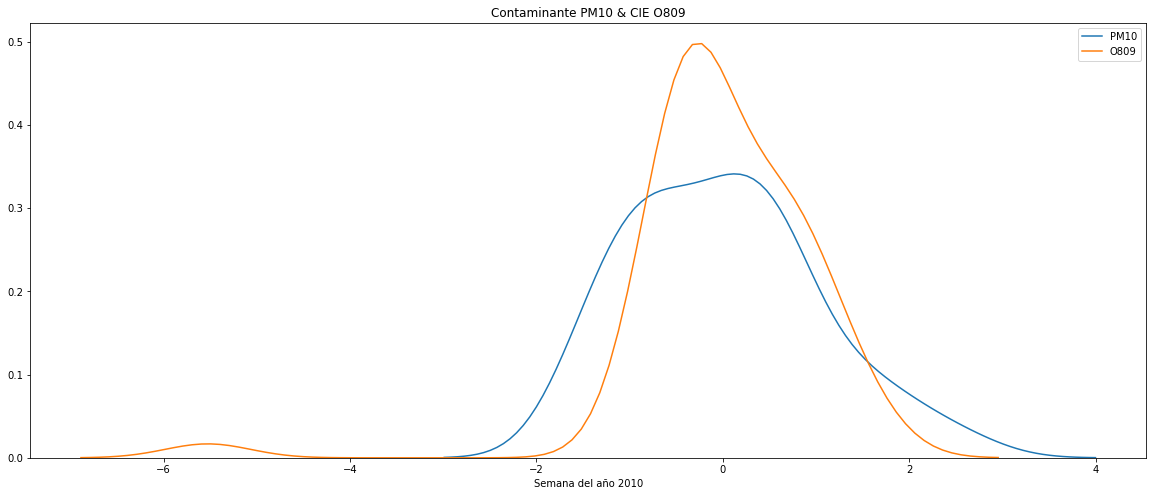


PM10 & O829


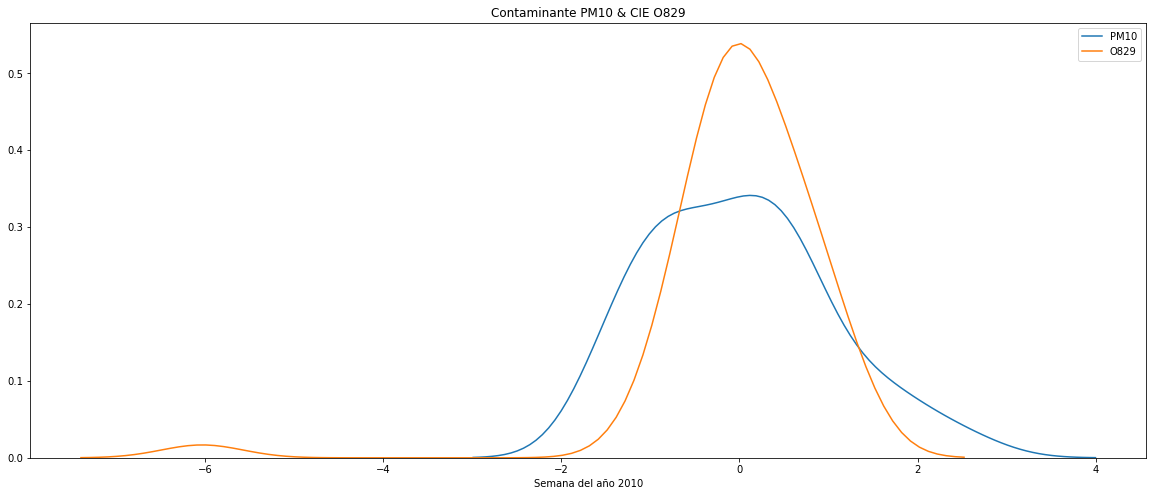


PM10 & O800


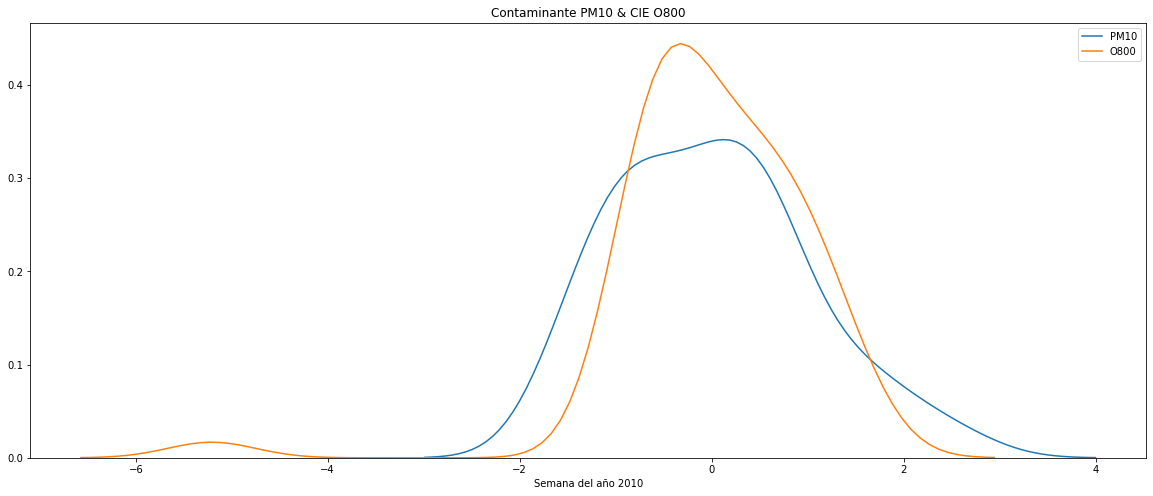


PM10 & O064


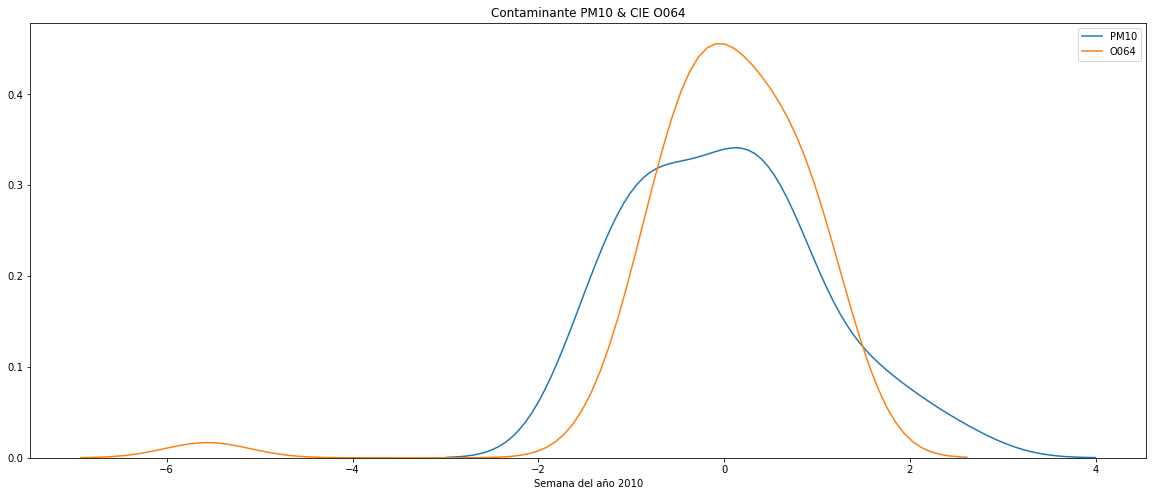


PM10 & N189


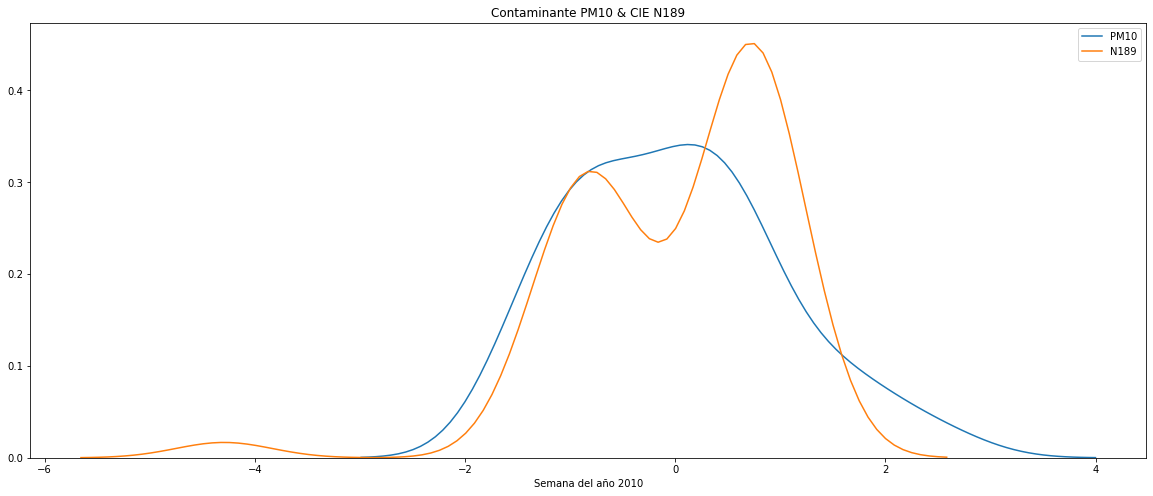


PM10 & O342


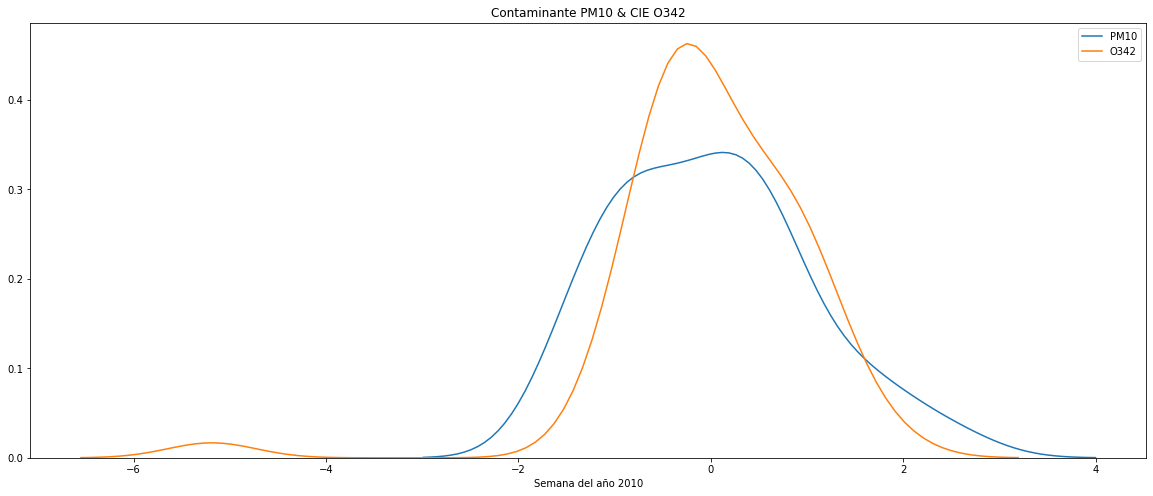


PM10 & K359


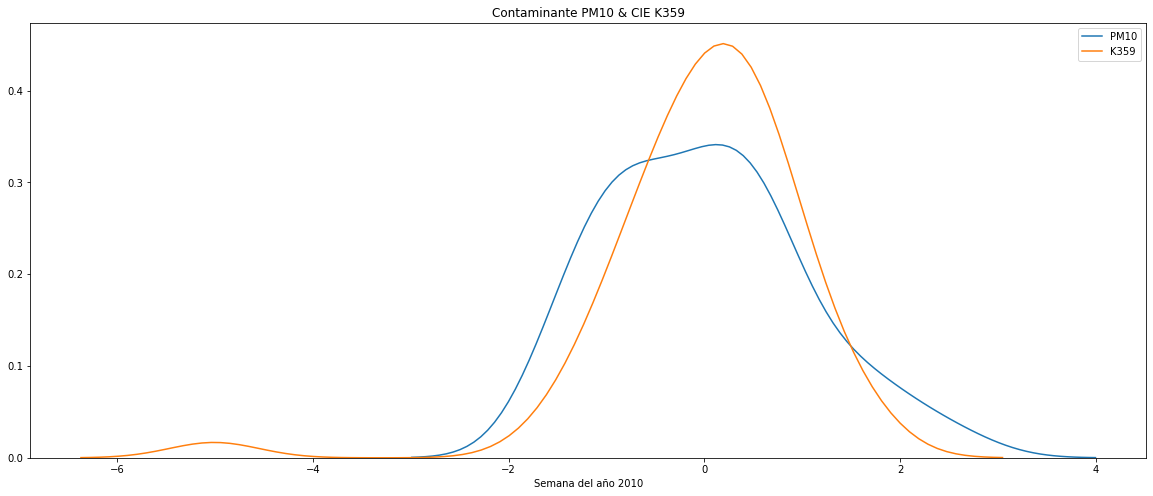


PM10 & H


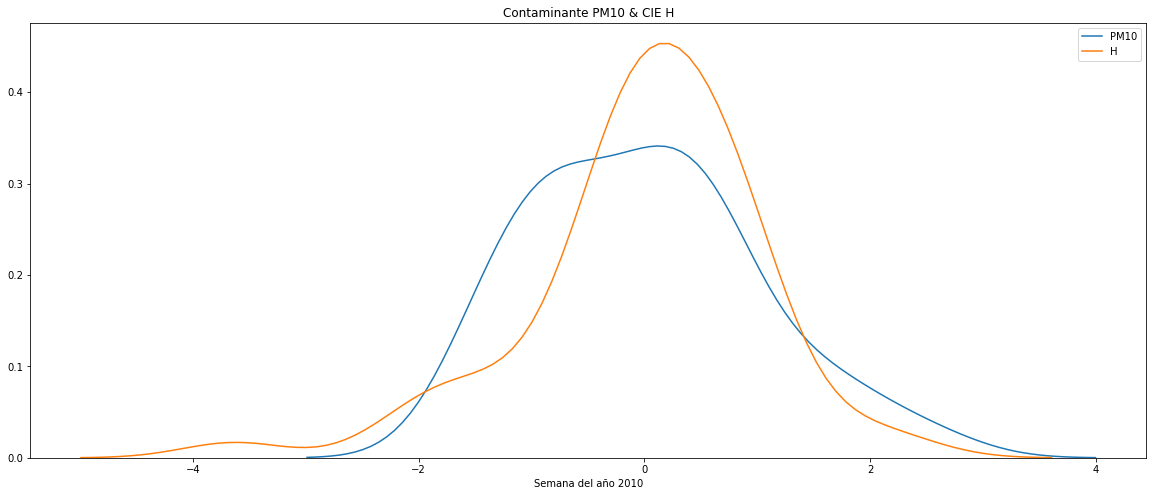


PM10 & I


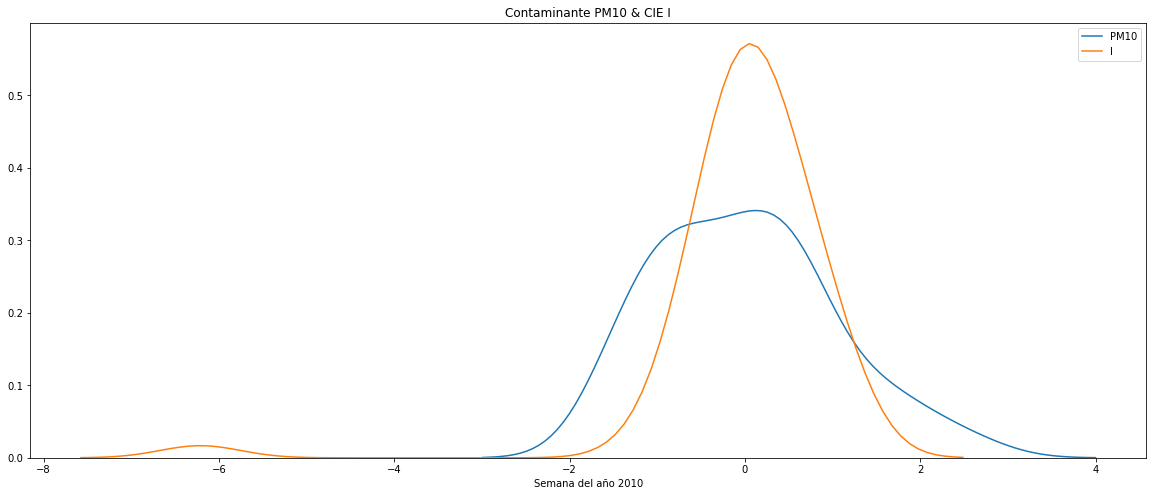


PM10 & J


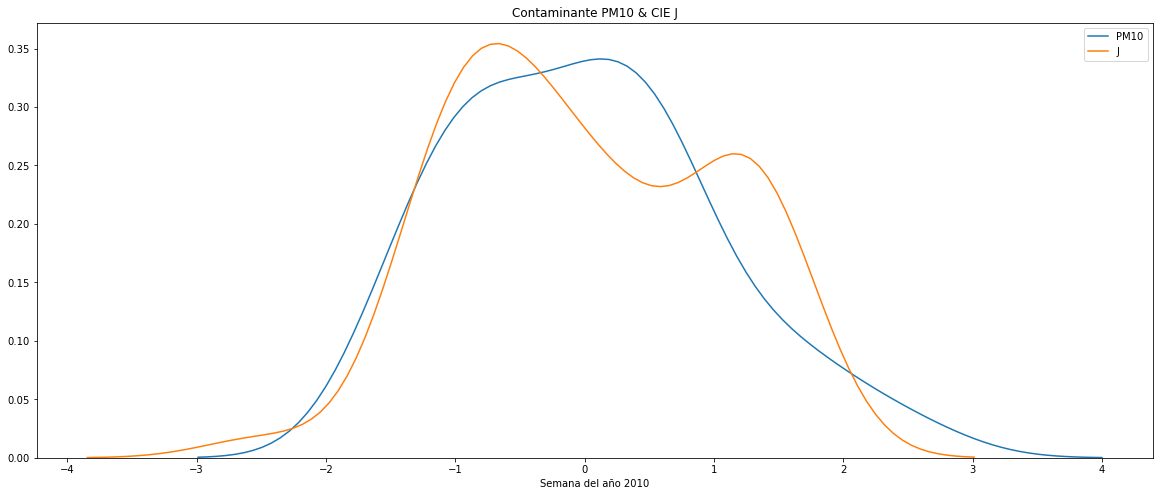

In [10]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2011)


In [11]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2011'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   PM10
0      2011-01-01 00  124.0
1      2011-01-01 00  308.0
2      2011-01-01 00  154.0
3      2011-01-01 00  454.0
4      2011-01-01 00  180.0
...              ...    ...
64701  2011-12-31 23  699.0
64702  2011-12-31 23  517.0
64703  2011-12-31 23  244.0
64704  2011-12-31 23  119.0
64705  2011-12-31 23  847.0

[64706 rows x 2 columns]

In [12]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   PM10
0     2011-01-01 00:00:00  124.0
1     2011-01-01 00:00:00  308.0
2     2011-01-01 00:00:00  154.0
3     2011-01-01 00:00:00  454.0
4     2011-01-01 00:00:00  180.0
...                   ...    ...
64701 2011-12-31 23:00:00  699.0
64702 2011-12-31 23:00:00  517.0
64703 2011-12-31 23:00:00  244.0
64704 2011-12-31 23:00:00  119.0
64705 2011-12-31 23:00:00  847.0

[64706 rows x 2 columns]

In [13]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   PM10  sem
0     2011-01-01 00:00:00  124.0   52
1     2011-01-01 00:00:00  308.0   52
2     2011-01-01 00:00:00  154.0   52
3     2011-01-01 00:00:00  454.0   52
4     2011-01-01 00:00:00  180.0   52
...                   ...    ...  ...
64701 2011-12-31 23:00:00  699.0   52
64702 2011-12-31 23:00:00  517.0   52
64703 2011-12-31 23:00:00  244.0   52
64704 2011-12-31 23:00:00  119.0   52
64705 2011-12-31 23:00:00  847.0   52

[64706 rows x 3 columns]

In [14]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        22/03/2011     T311
1        22/03/2011     K579
2        22/03/2011     L039
3        04/04/2011     K359
4        05/04/2011     J189
...             ...      ...
1048567  21/09/2011     I091
1048568  21/09/2011     I350
1048569  22/09/2011     I471
1048570  22/09/2011     I739
1048571  23/09/2011     I258

[1048559 rows x 2 columns]

In [15]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2011-03-22     T311   12
1       2011-03-22     K579   12
2       2011-03-22     L039   12
3       2011-04-04     K359   14
4       2011-04-05     J189   14
...            ...      ...  ...
1032381 2011-09-21     I091   38
1032382 2011-09-21     I350   38
1032383 2011-09-22     I471   38
1032384 2011-09-22     I739   38
1032385 2011-09-23     I258   38

[1032386 rows x 3 columns]

In [16]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17352
2     18696
3     19496
4     19507
5     19332
6     18294
7     19327
8     19752
9     19824
10    19289
11    19828
12    18756
13    19630
14    19820
15    19684
16    17260
17    18346
18    17878
19    18577
20    19349
21    19384
22    19016
23    19569
24    19636
25    19737
26    19807
27    19845
28    20238
29    20570
30    20463
31    20628
32    21214
33    21237
34    21296
35    21472
36    21765
37    20779
38    21674
39    23011
40    22644
41    22416
42    22546
43    22094
44    20010
45    22360
46    21769
47    21130
48    21236
49    20987
50    20903
51    19862
52     3091
Name: sem, dtype: int64

In [17]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem     PM10
0     1  102.598
1     2  62.1115
2     3  100.763
3     4  90.9566
4     5   88.866
5     6  83.0379
6     7  102.841
7     8  103.466
8     9  114.708
9    10  93.7034
10   11  89.1169
11   12   92.112
12   13  99.6341
13   14  128.225
14   15   131.52
15   16   118.33
16   17  137.396
17   18  73.6196
18   19  108.888
19   20  90.3725
20   21  104.875
21   22  80.5896
22   23  62.4117
23   24  75.4066
24   25  63.0193
25   26   51.376
26   27  78.9236
27   28  55.2267
28   29  65.7225
29   30  63.9361
30   31  56.1323
31   32  83.7387
32   33  74.4319
33   34  56.4197
34   35  57.2675
35   36  78.4144
36   37  62.6152
37   38  63.6753
38   39  74.6579
39   40  57.7076
40   41  75.3021
41   42  99.9491
42   43  81.0285
43   44  89.8846
44   45  78.6137
45   46  96.6268
46   47  88.4735
47   48  118.843
48   49  66.1627
49   50  68.0917
50   51  58.2164
51   52  95.0186


2011

PM10 & O809


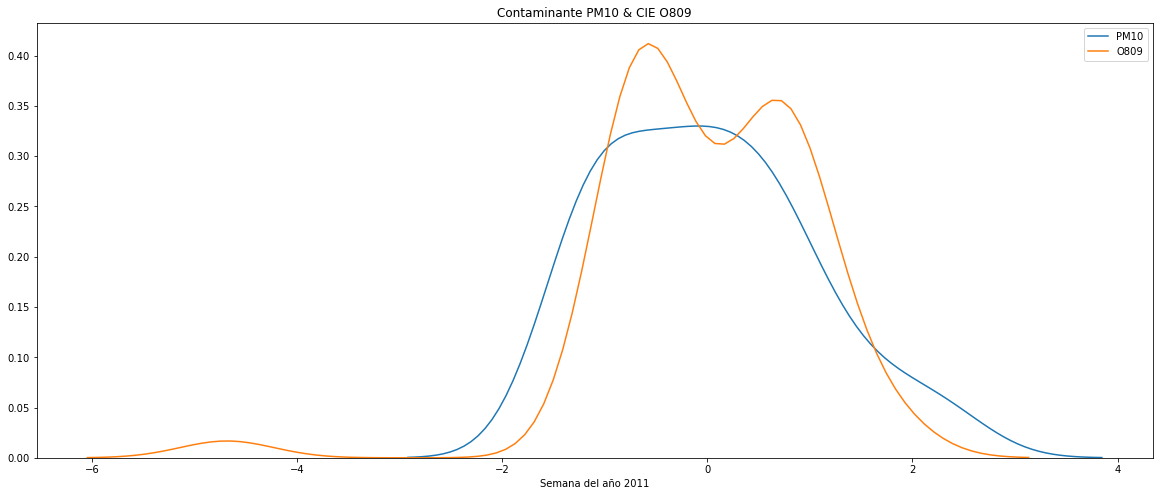


PM10 & O800


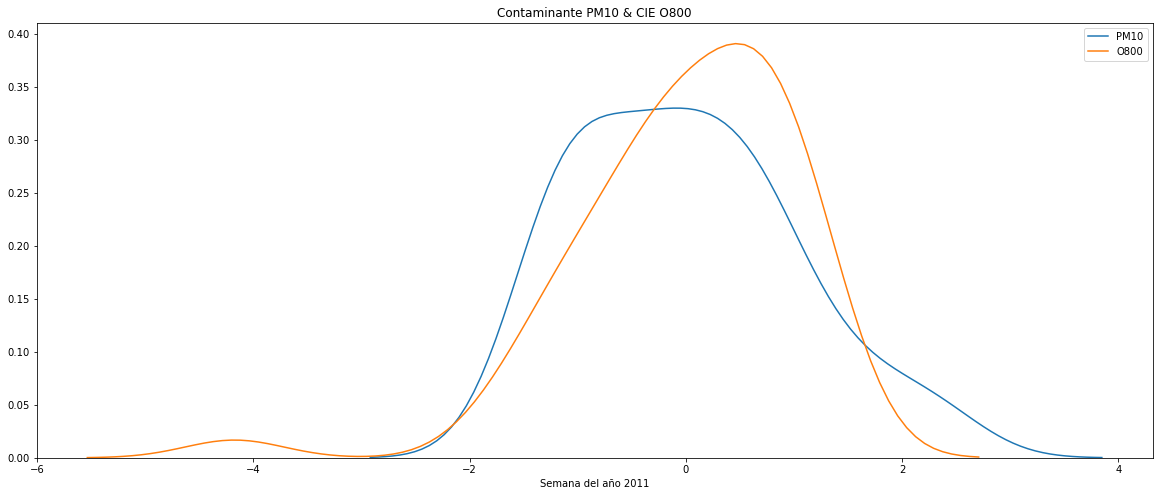


PM10 & O064


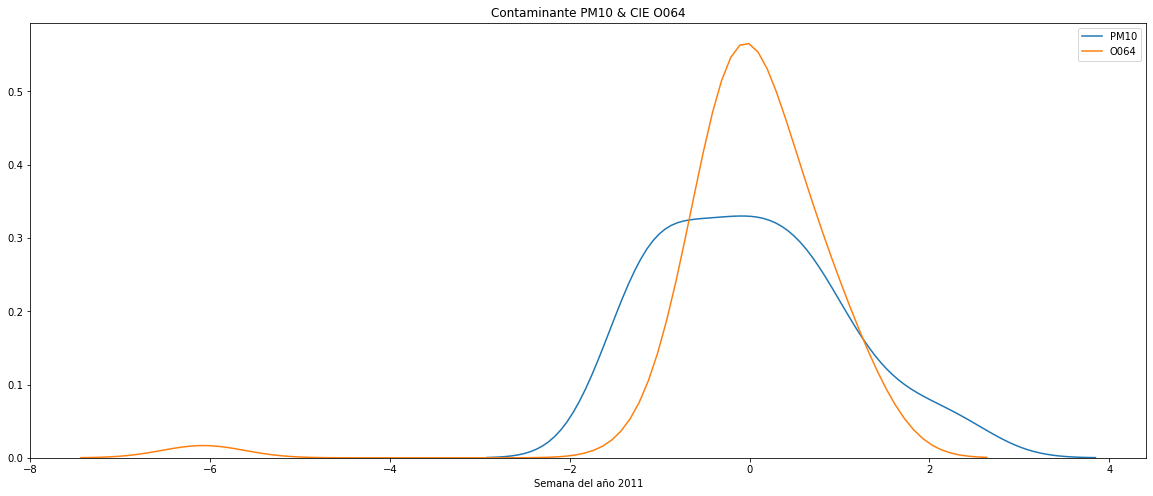


PM10 & O342


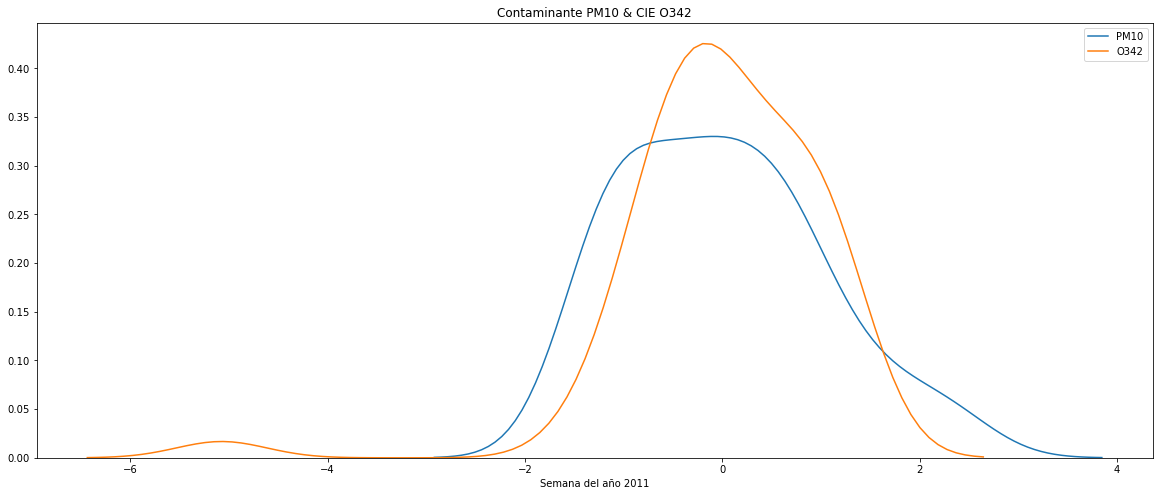


PM10 & O829


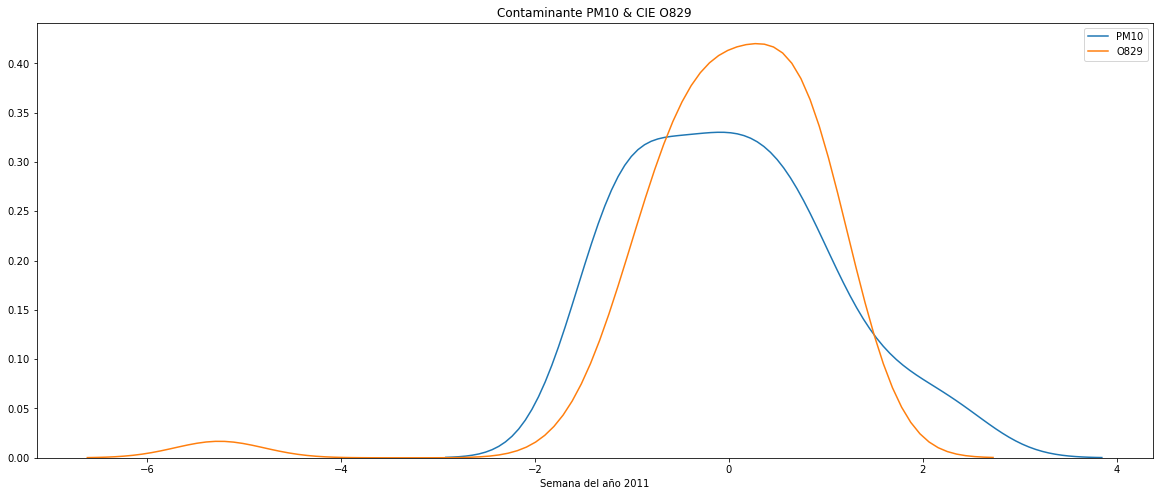


PM10 & N189


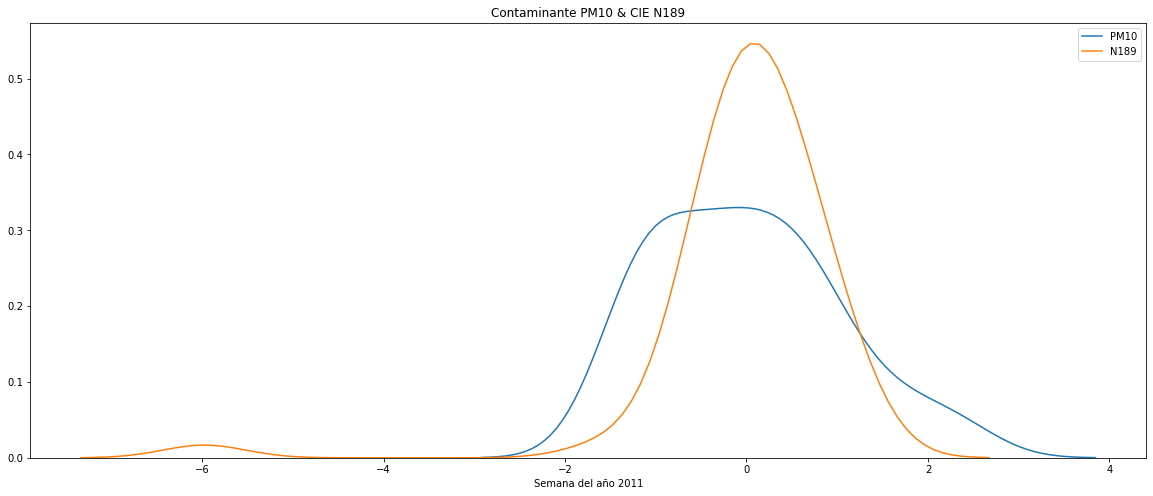


PM10 & N180


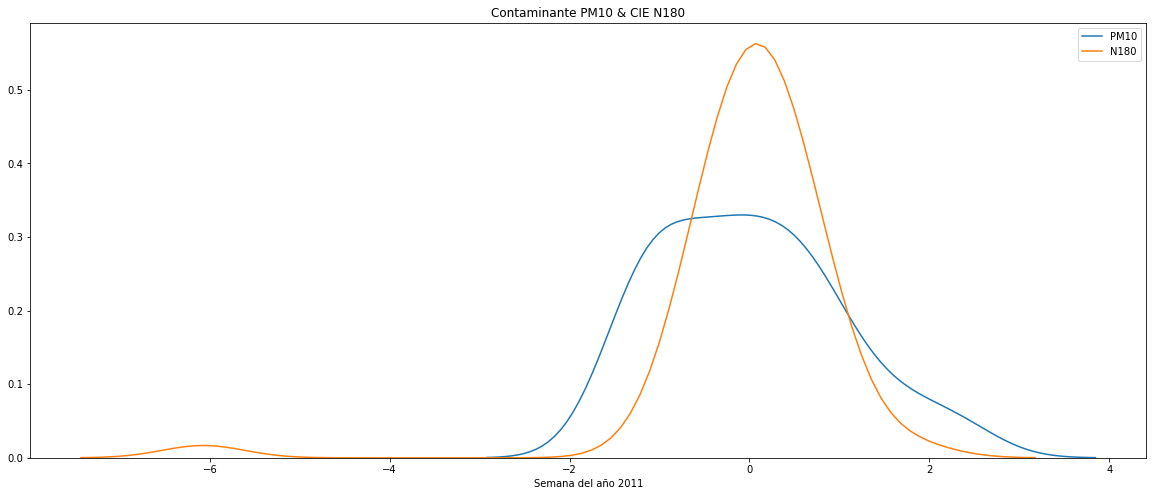


PM10 & H


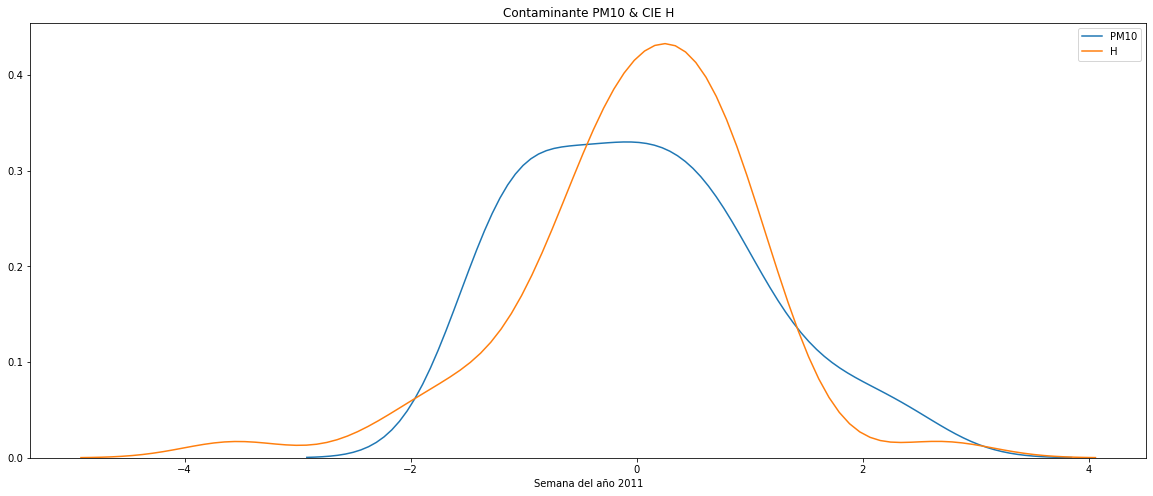


PM10 & I


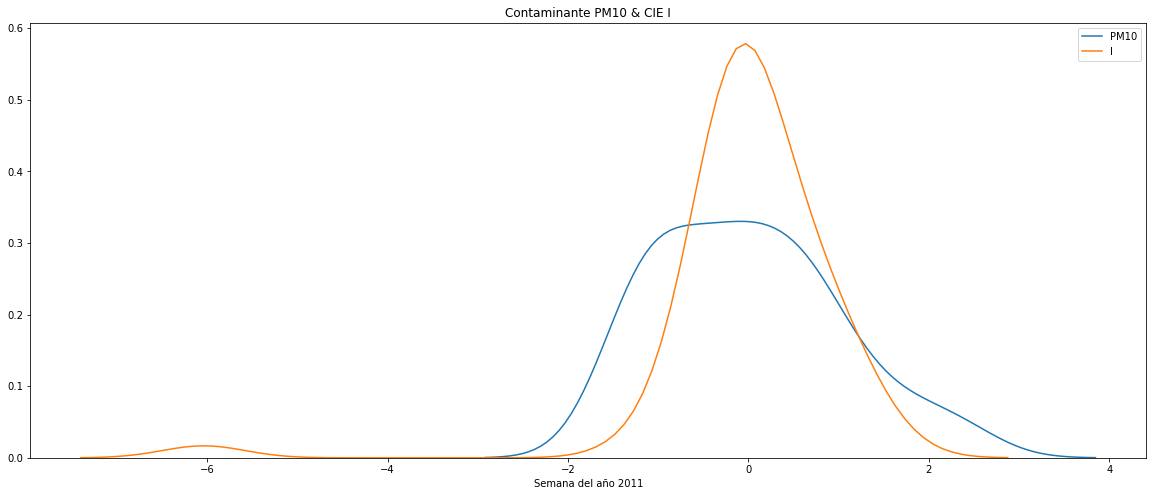


PM10 & J


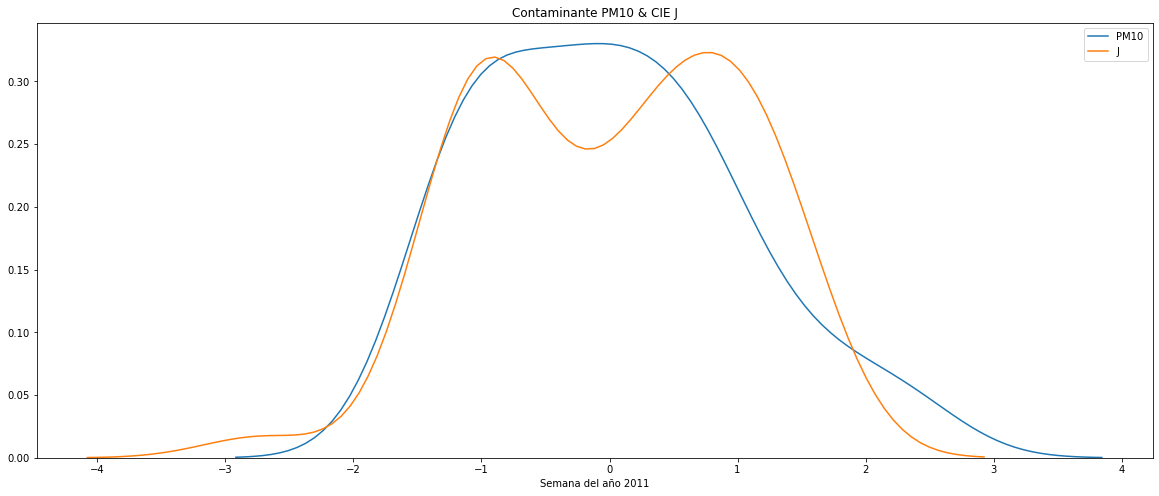

In [18]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2012)

In [19]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2012'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   PM10
0      2012-01-01 00  213.0
1      2012-01-01 00  861.0
2      2012-01-01 00  166.0
3      2012-01-01 00  300.0
4      2012-01-01 00  508.0
...              ...    ...
69486  2012-12-31 23  349.0
69487  2012-12-31 23  448.0
69488  2012-12-31 23  536.0
69489  2012-12-31 23  304.0
69490  2012-12-31 23  568.0

[69491 rows x 2 columns]

In [20]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   PM10
0     2012-01-01 00:00:00  213.0
1     2012-01-01 00:00:00  861.0
2     2012-01-01 00:00:00  166.0
3     2012-01-01 00:00:00  300.0
4     2012-01-01 00:00:00  508.0
...                   ...    ...
69486 2012-12-31 23:00:00  349.0
69487 2012-12-31 23:00:00  448.0
69488 2012-12-31 23:00:00  536.0
69489 2012-12-31 23:00:00  304.0
69490 2012-12-31 23:00:00  568.0

[69491 rows x 2 columns]

In [21]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   PM10  sem
0     2012-01-01 00:00:00  213.0    1
1     2012-01-01 00:00:00  861.0    1
2     2012-01-01 00:00:00  166.0    1
3     2012-01-01 00:00:00  300.0    1
4     2012-01-01 00:00:00  508.0    1
...                   ...    ...  ...
69486 2012-12-31 23:00:00  349.0    1
69487 2012-12-31 23:00:00  448.0    1
69488 2012-12-31 23:00:00  536.0    1
69489 2012-12-31 23:00:00  304.0    1
69490 2012-12-31 23:00:00  568.0    1

[69491 rows x 3 columns]

In [22]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        31/01/2012     N879
1        31/01/2012     O829
2        30/01/2012     O809
3        29/01/2012     O600
4        27/01/2012     O809
...             ...      ...
1048570  20/08/2012     C509
1048571  20/08/2012     C509
1048572  20/08/2012     C509
1048573  20/08/2012     C504
1048574  20/08/2012     C349

[1048553 rows x 2 columns]

In [23]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2012-01-31     N879    5
1       2012-01-31     O829    5
2       2012-01-30     O809    5
3       2012-01-29     O600    5
4       2012-01-27     O809    4
...            ...      ...  ...
1031354 2012-08-20     C509   34
1031355 2012-08-20     C509   34
1031356 2012-08-20     C509   34
1031357 2012-08-20     C504   34
1031358 2012-08-20     C349   34

[1031359 rows x 3 columns]

In [24]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     18779
2     21239
3     21814
4     21843
5     21599
6     20500
7     21971
8     21587
9     22496
10    22702
11    22764
12    21001
13    22828
14    20586
15    21345
16    22002
17    22369
18    21219
19    22078
20    22397
21    22780
22    22819
23    22913
24    22732
25    22251
26    19190
27    18462
28    18710
29    18718
30    18512
31    18944
32    18725
33    18393
34    18694
35    19395
36    19720
37    19381
38    18956
39    19045
40    18645
41    18980
42    18468
43    18446
44    17378
45    17753
46    18327
47    16771
48    18050
49    17672
50    17094
51    16777
52     5539
Name: sem, dtype: int64

In [25]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem     PM10
0     1  90.6033
1     2  92.0835
2     3  110.237
3     4  94.4858
4     5  72.8544
5     6  48.3034
6     7  71.9501
7     8  78.4591
8     9  85.3396
9    10  63.6634
10   11   69.256
11   12  79.9768
12   13  72.6285
13   14  84.6466
14   15   54.327
15   16  72.7319
16   17  90.6383
17   18  76.6593
18   19  63.4849
19   20  51.9265
20   21  84.2463
21   22  71.8706
22   23  58.5959
23   24  83.7291
24   25  51.6791
25   26  60.4803
26   27  58.7121
27   28  62.4977
28   29  63.4707
29   30  71.2975
30   31  73.9348
31   32  56.6619
32   33  58.3237
33   34  52.6672
34   35   60.247
35   36  68.0949
36   37  46.6194
37   38  60.0731
38   39  48.0929
39   40  62.7785
40   41  51.3292
41   42  68.3263
42   43  59.3122
43   44  69.6031
44   45  67.3598
45   46  47.4232
46   47  59.6495
47   48  89.7624
48   49  108.356
49   50  104.011
50   51  112.706
51   52  114.019


2012

PM10 & O809


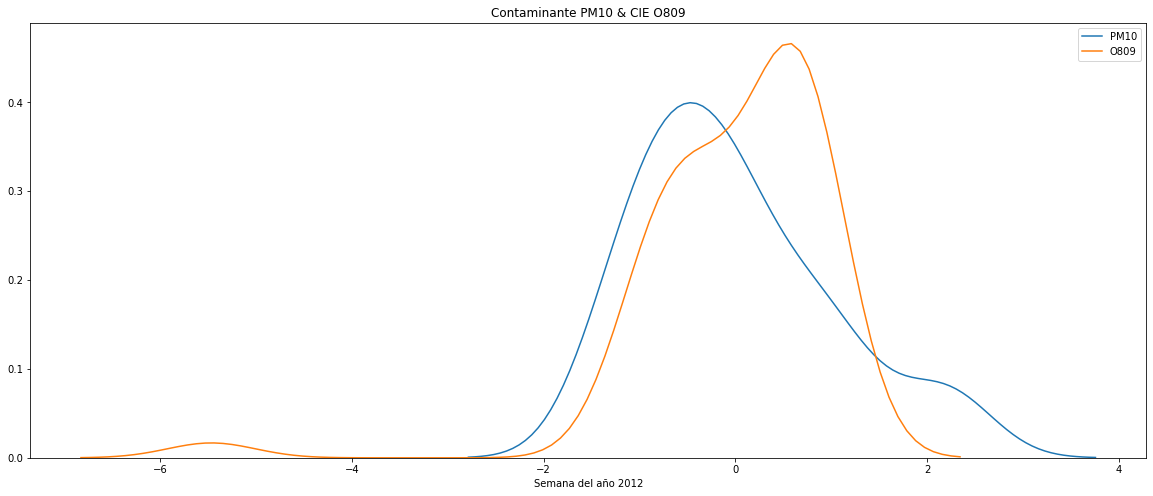


PM10 & O800


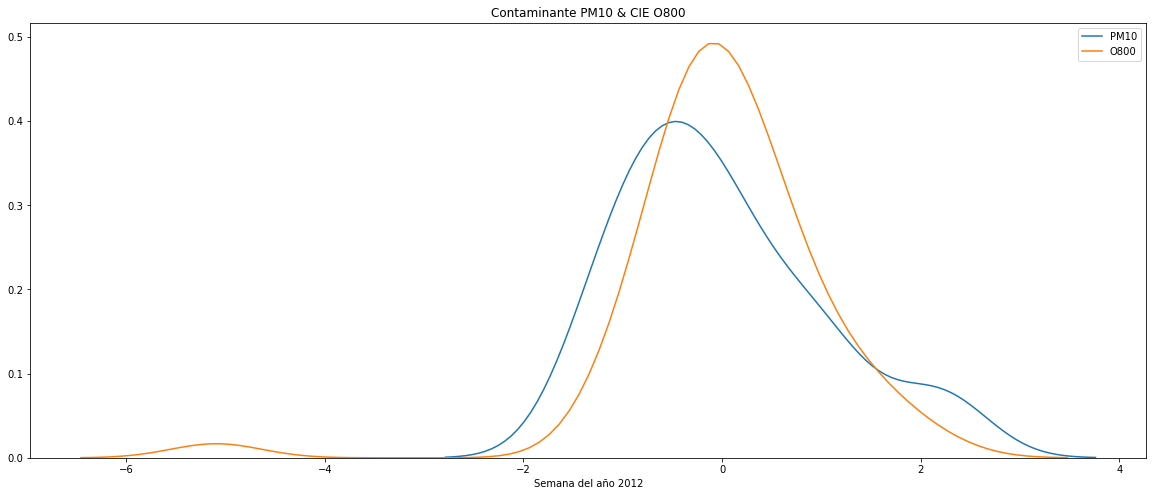


PM10 & O829


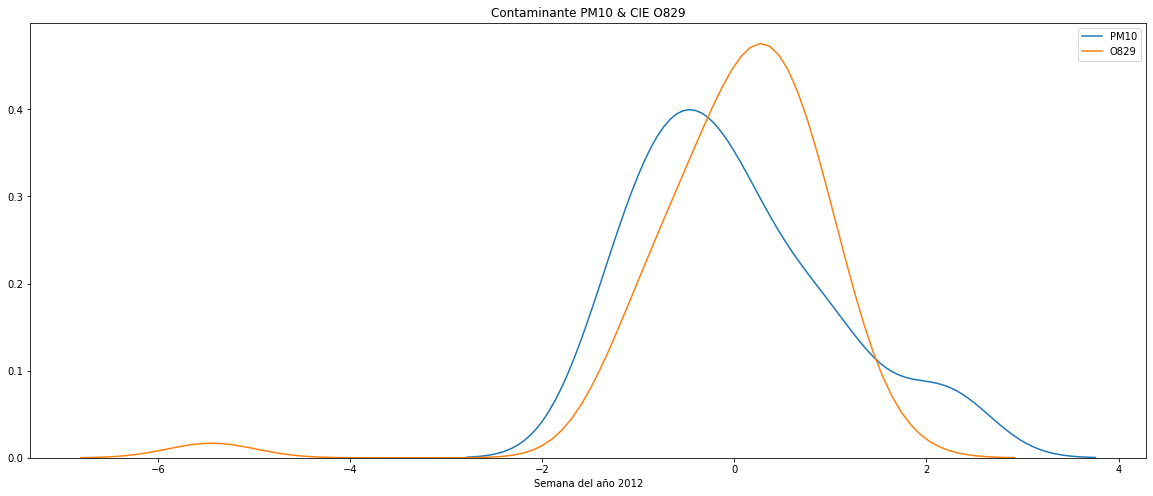


PM10 & O064


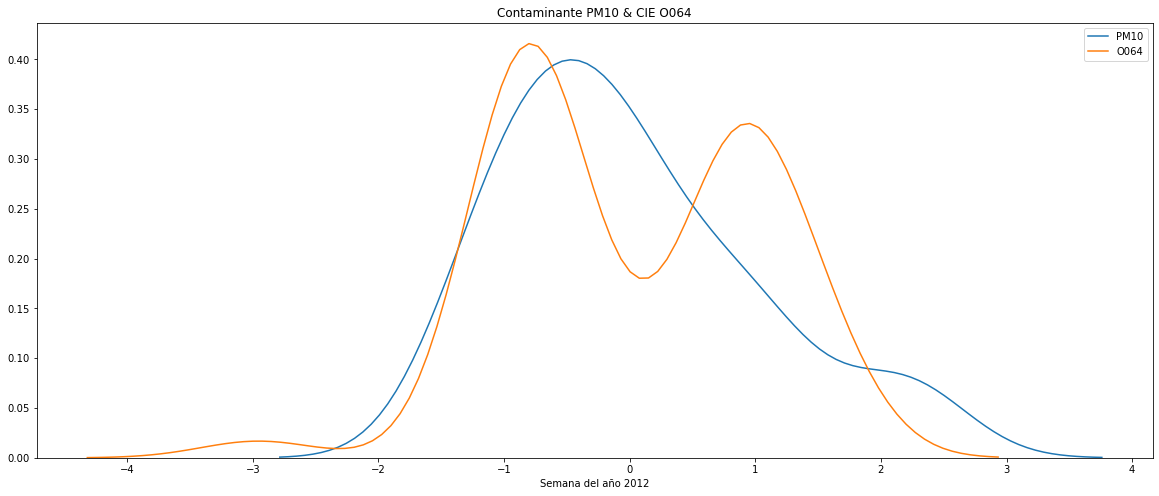


PM10 & N189


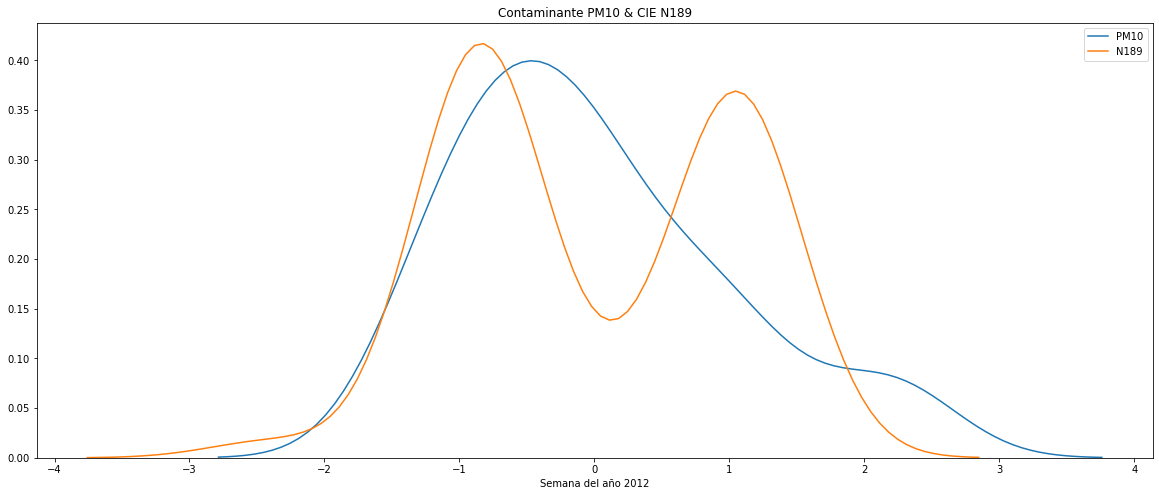


PM10 & O342


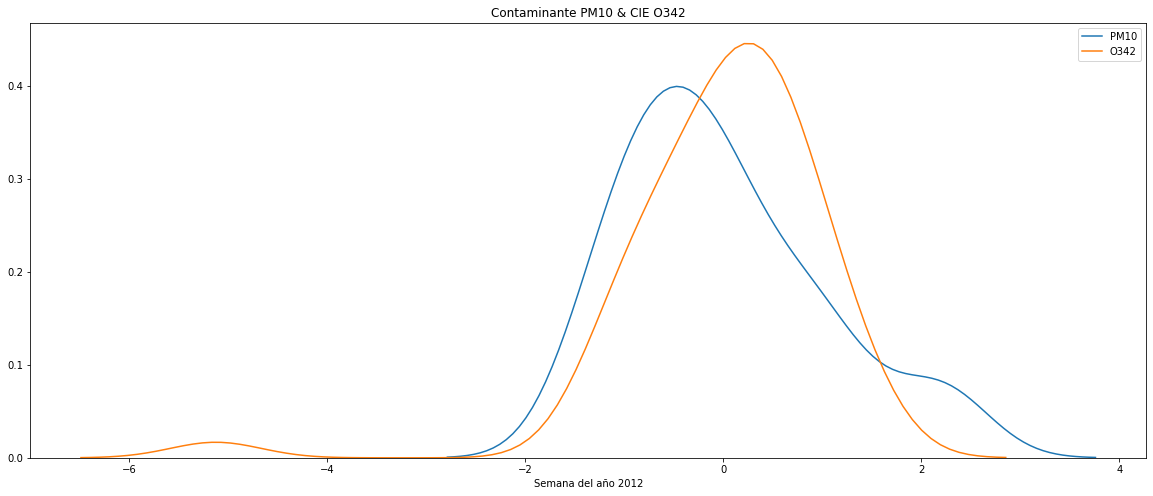


PM10 & K359


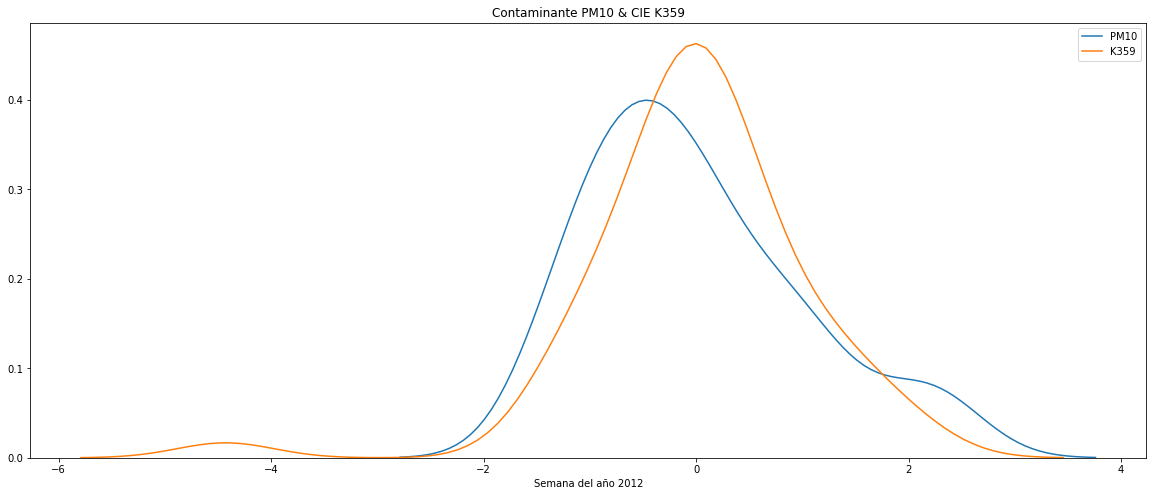


PM10 & H


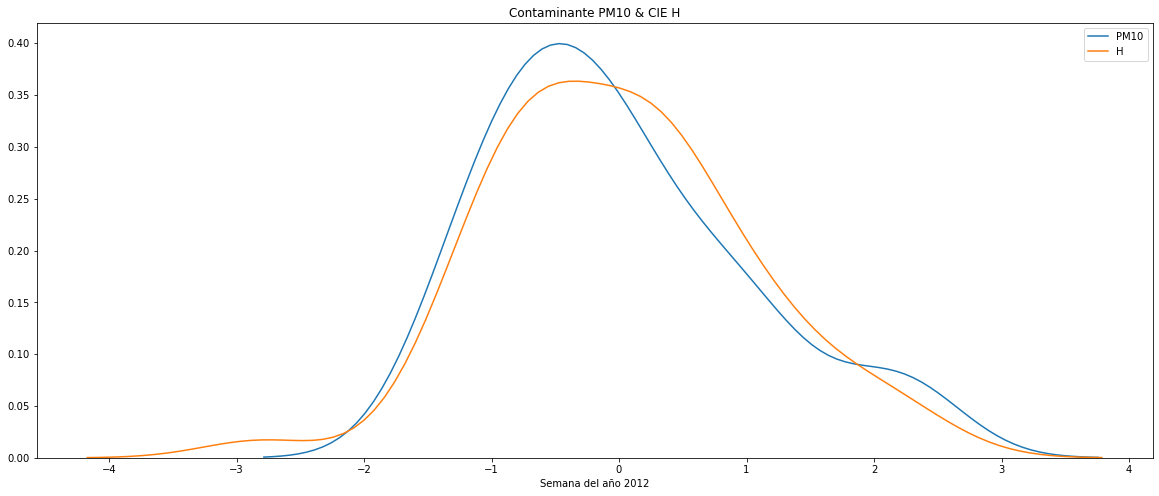


PM10 & I


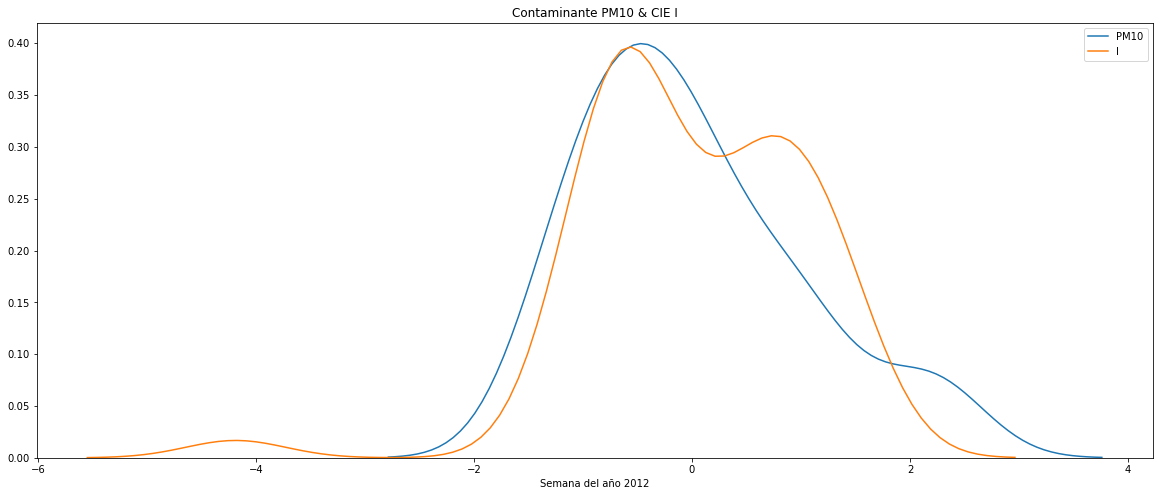


PM10 & J


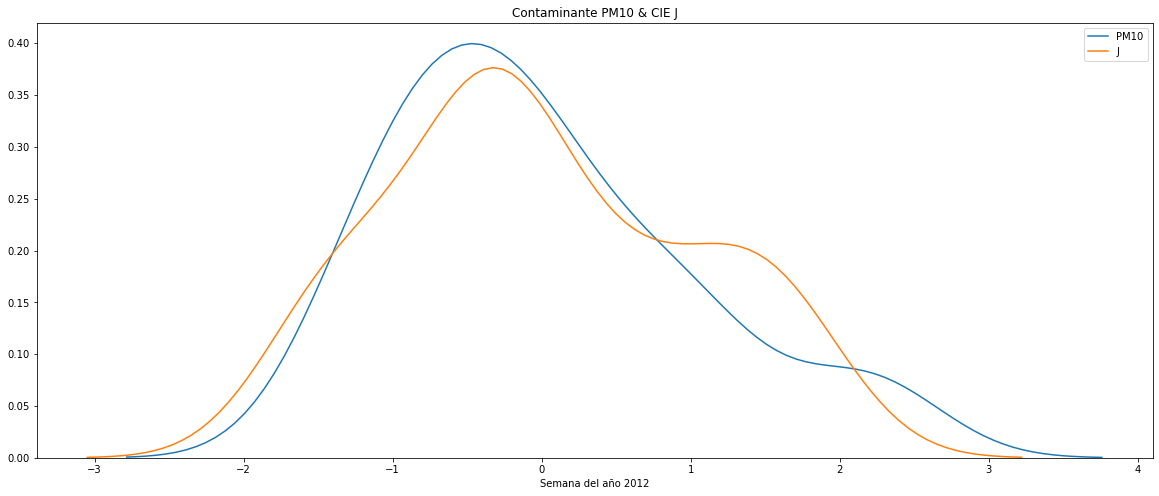

In [26]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2013)

In [27]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2013'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   PM10
0      2013-01-01 00  332.0
1      2013-01-01 00  859.0
2      2013-01-01 00  205.0
3      2013-01-01 00  640.0
4      2013-01-01 00  440.0
...              ...    ...
75596  2013-12-31 23  122.0
75597  2013-12-31 23  174.0
75598  2013-12-31 23  153.0
75599  2013-12-31 23   91.0
75600  2013-12-31 23   40.0

[75601 rows x 2 columns]

In [28]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   PM10
0     2013-01-01 00:00:00  332.0
1     2013-01-01 00:00:00  859.0
2     2013-01-01 00:00:00  205.0
3     2013-01-01 00:00:00  640.0
4     2013-01-01 00:00:00  440.0
...                   ...    ...
75596 2013-12-31 23:00:00  122.0
75597 2013-12-31 23:00:00  174.0
75598 2013-12-31 23:00:00  153.0
75599 2013-12-31 23:00:00   91.0
75600 2013-12-31 23:00:00   40.0

[75601 rows x 2 columns]

In [29]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   PM10  sem
0     2013-01-01 00:00:00  332.0    1
1     2013-01-01 00:00:00  859.0    1
2     2013-01-01 00:00:00  205.0    1
3     2013-01-01 00:00:00  640.0    1
4     2013-01-01 00:00:00  440.0    1
...                   ...    ...  ...
75596 2013-12-31 23:00:00  122.0    1
75597 2013-12-31 23:00:00  174.0    1
75598 2013-12-31 23:00:00  153.0    1
75599 2013-12-31 23:00:00   91.0    1
75600 2013-12-31 23:00:00   40.0    1

[75601 rows x 3 columns]

In [30]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        26/12/2012     O821
1        26/12/2012     O010
2        26/12/2012     O821
3        26/12/2012     O809
4        26/12/2012     O620
...             ...      ...
2879308  04/08/2013     E145
2879309  03/08/2013     J459
2879310  04/08/2013     S720
2879311  05/07/2013     D443
2879312  26/08/2013     N189

[2879313 rows x 2 columns]

In [31]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2013-02-27     N189    9
1       2013-02-27     N189    9
2       2013-02-27     D24X    9
3       2013-02-27     D259    9
4       2013-02-27     H269    9
...            ...      ...  ...
2838186 2013-08-04     E145   32
2838187 2013-08-03     J459   31
2838188 2013-08-04     S720   32
2838189 2013-07-05     D443   27
2838190 2013-08-26     N189   35

[2838191 rows x 3 columns]

In [32]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     30917
2     51944
3     54767
4     55143
5     56515
6     53178
7     56002
8     55853
9     55571
10    56491
11    56657
12    53958
13    51466
14    52506
15    54445
16    55322
17    55199
18    51481
19    54249
20    54902
21    56010
22    55427
23    55435
24    55423
25    54589
26    54972
27    54102
28    55326
29    54767
30    55215
31    55467
32    56402
33    57405
34    57124
35    58985
36    58378
37    59142
38    55204
39    59186
40    59148
41    59384
42    58773
43    57475
44    56153
45    57378
46    57442
47    53195
48    56061
49    55459
50    54729
51    53190
52    24679
Name: sem, dtype: int64

In [33]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem     PM10
0     1  49.4679
1     2  98.5807
2     3  61.8509
3     4  75.4164
4     5  81.7104
5     6  58.8297
6     7  65.2878
7     8   76.055
8     9  80.4304
9    10   76.738
10   11  69.3797
11   12  69.9383
12   13  56.5466
13   14  51.6612
14   15  81.0765
15   16  85.3206
16   17  51.7467
17   18  51.4552
18   19  60.2223
19   20  60.2405
20   21  77.0459
21   22  49.6084
22   23  47.2023
23   24  46.5091
24   25  63.9193
25   26   64.093
26   27  55.5193
27   28  47.7359
28   29  44.0595
29   30  63.0399
30   31   61.632
31   32  78.9155
32   33  47.4409
33   34  43.9054
34   35  43.9092
35   36  43.1648
36   37  40.5747
37   38  38.8942
38   39  67.8118
39   40  68.1662
40   41  67.3604
41   42  52.0789
42   43  57.0905
43   44   69.955
44   45  57.2951
45   46  79.8271
46   47  59.9938
47   48  48.4232
48   49  91.4262
49   50  83.8008
50   51  95.6161
51   52  44.3536


2013

PM10 & O809


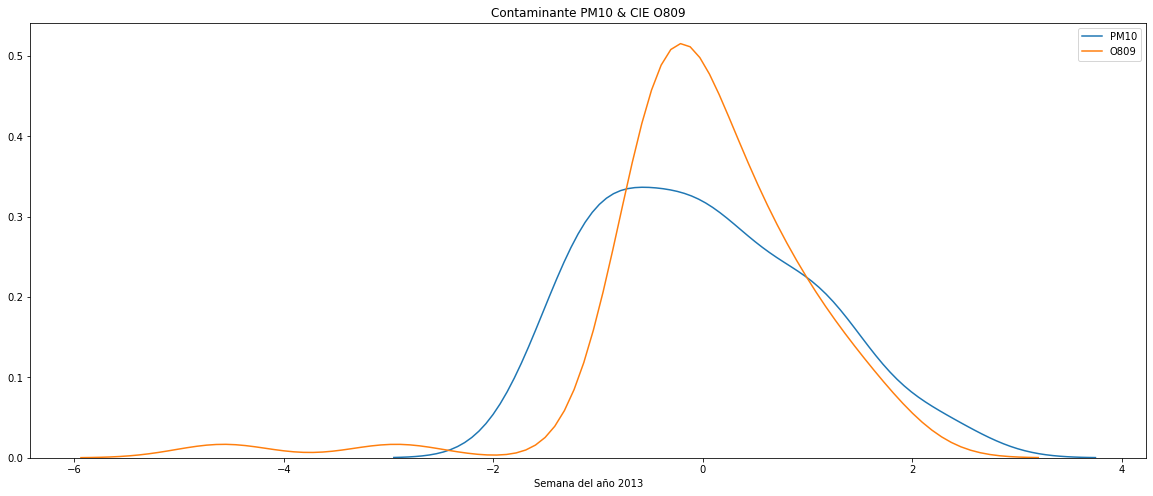


PM10 & O800


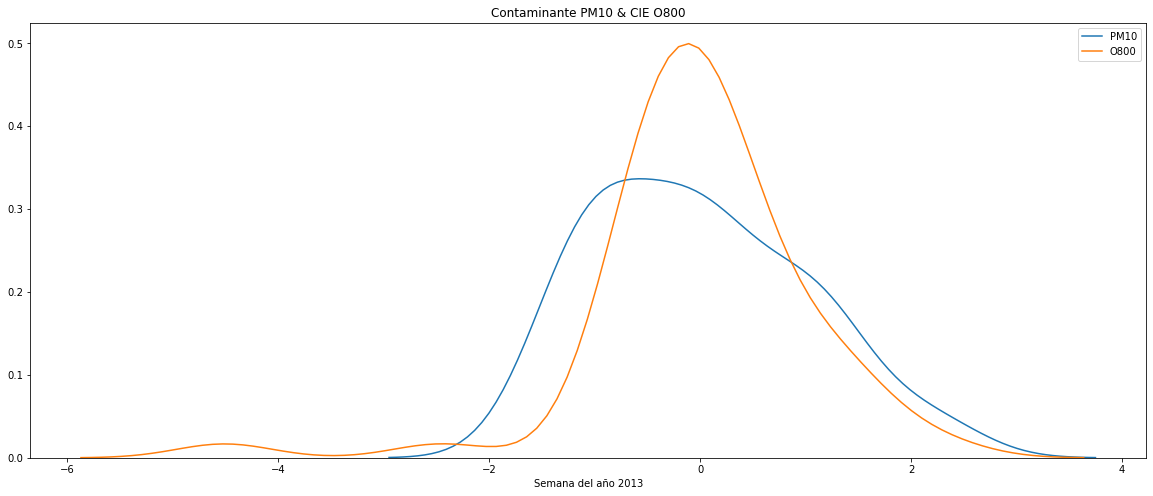


PM10 & O829


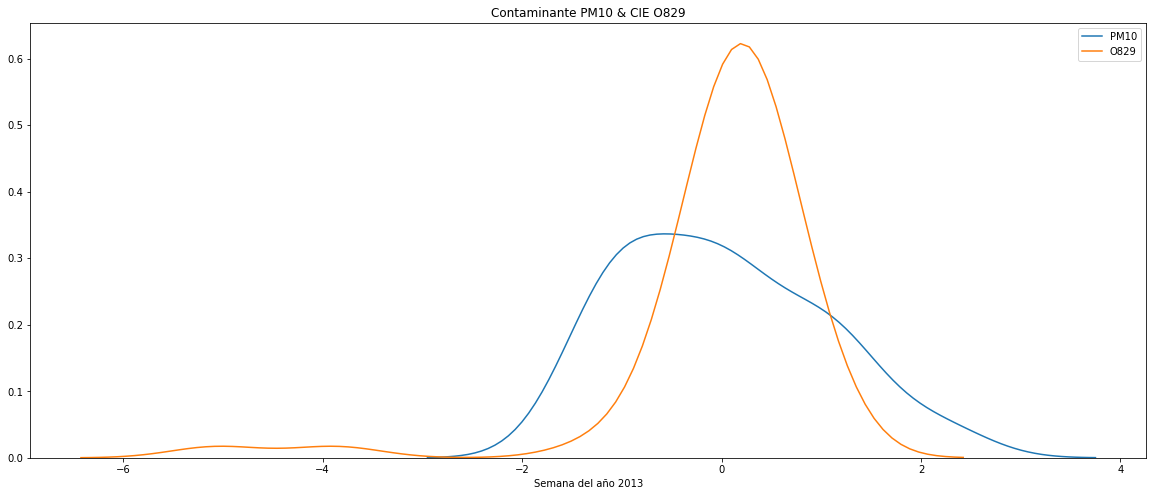


PM10 & N189


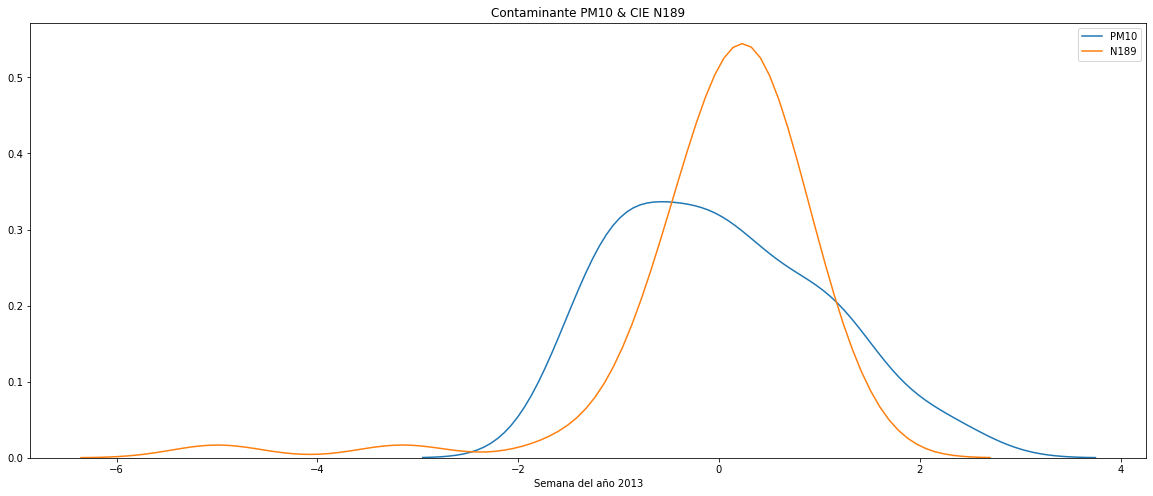


PM10 & O064


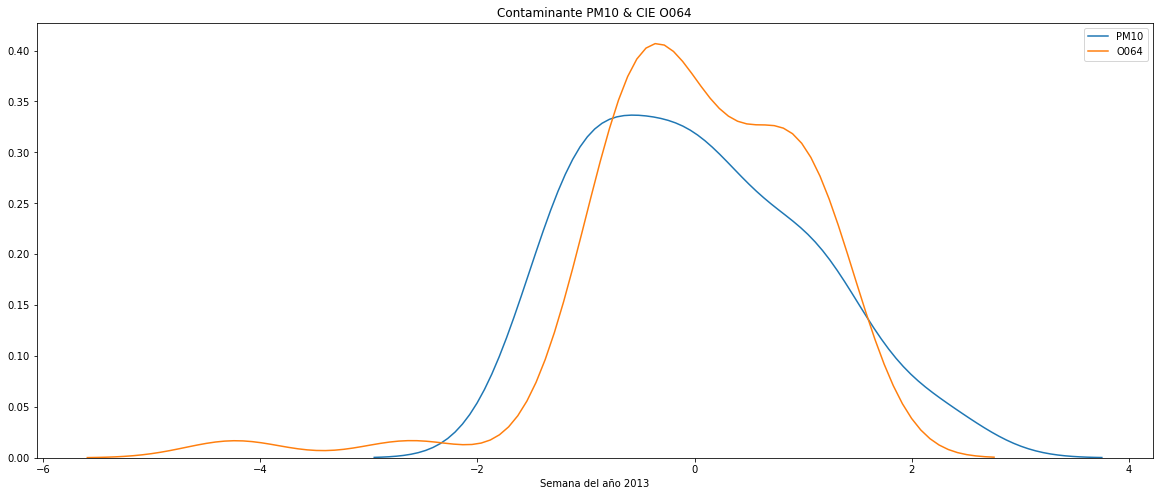


PM10 & O342


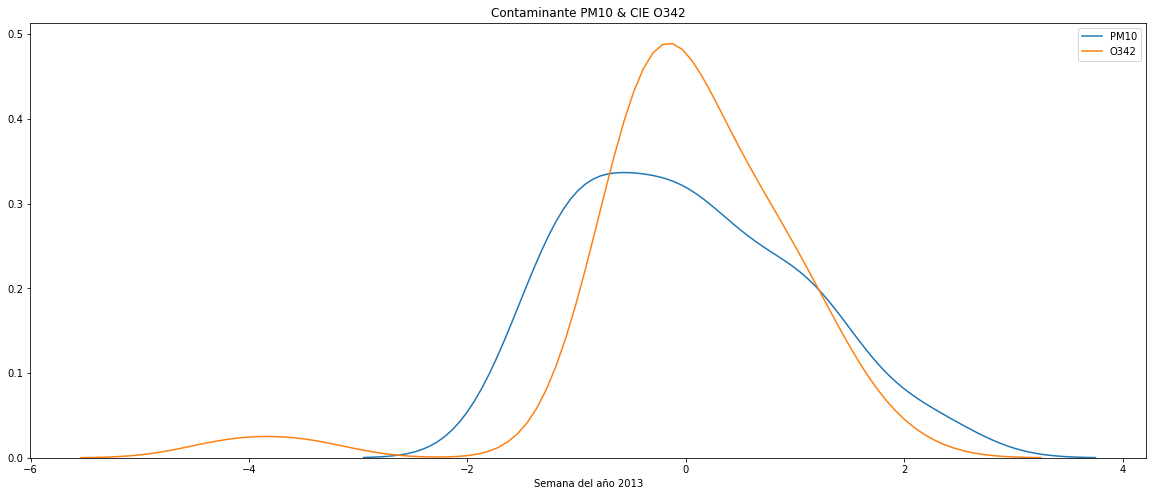


PM10 & K359


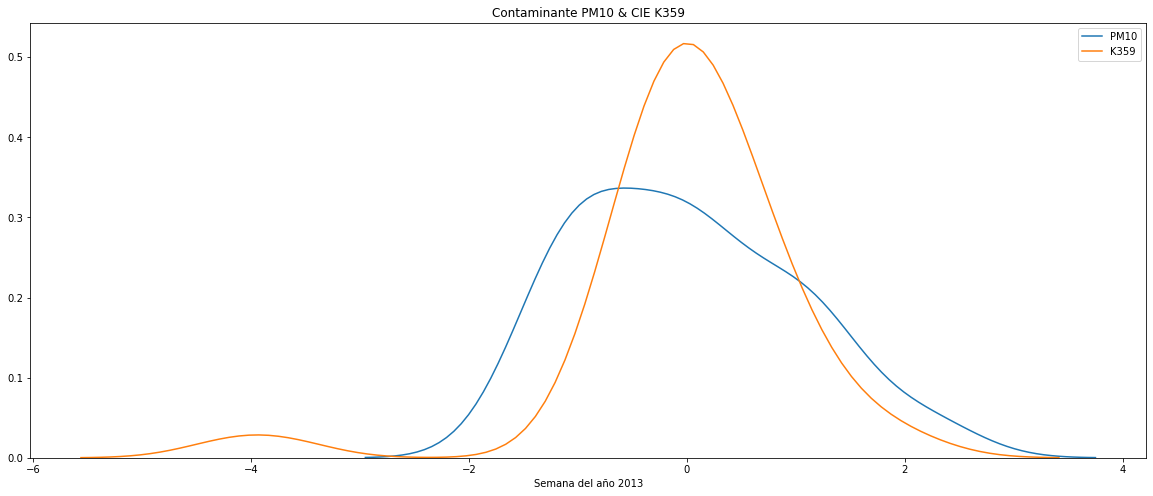


PM10 & H


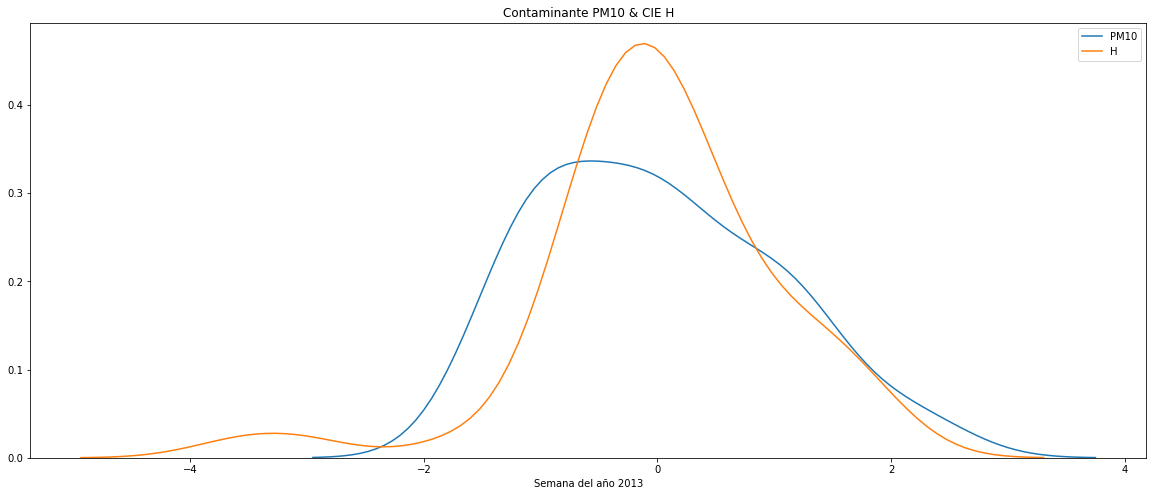


PM10 & I


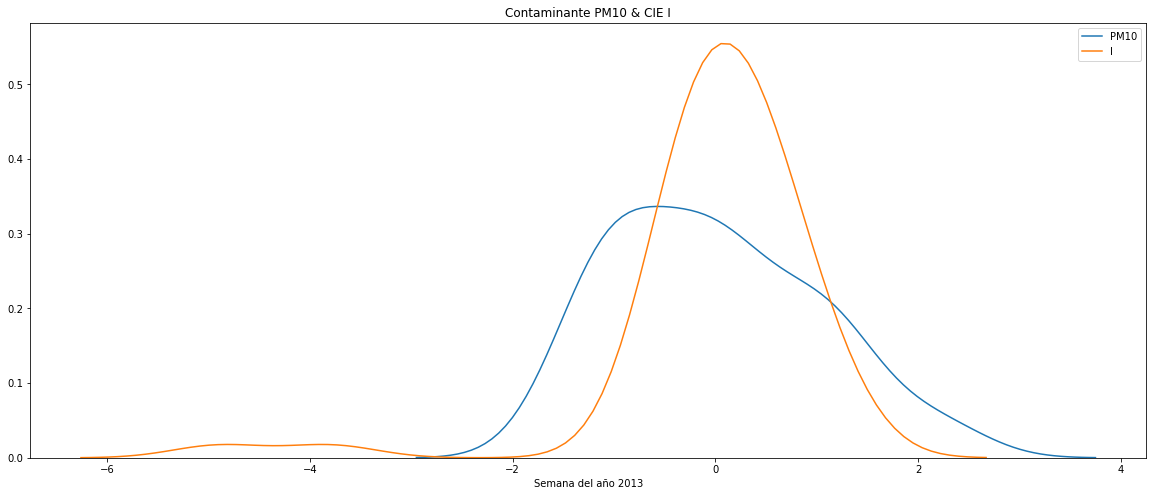


PM10 & J


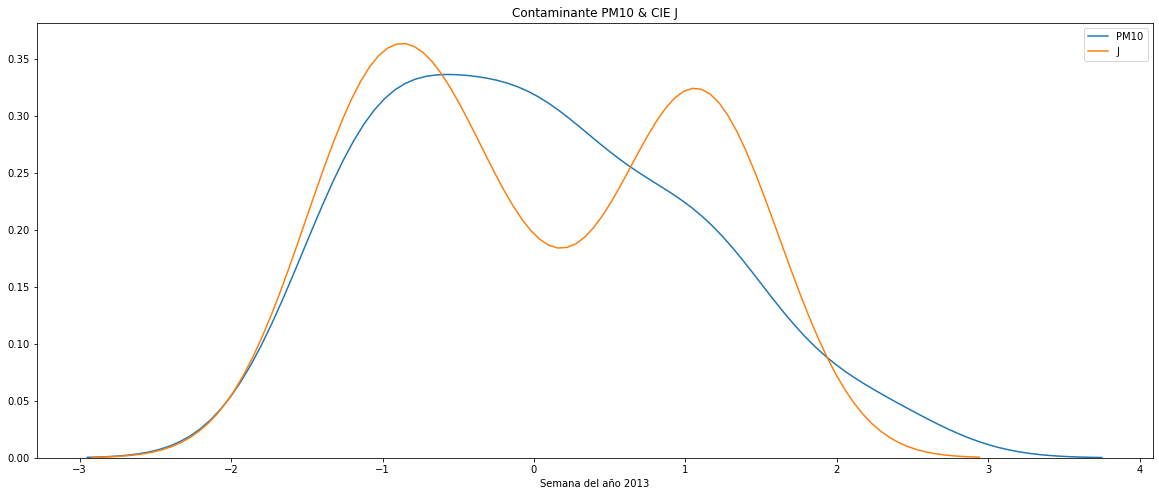

In [34]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2014)

In [35]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2014'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   PM10
0      2014-01-01 00  192.0
1      2014-01-01 00  137.0
2      2014-01-01 00  250.0
3      2014-01-01 00  157.0
4      2014-01-01 00  214.0
...              ...    ...
79668  2014-12-31 23   26.0
79669  2014-12-31 23   12.0
79670  2014-12-31 23   13.0
79671  2014-12-31 23   21.0
79672  2014-12-31 23   31.0

[79673 rows x 2 columns]

In [36]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   PM10
0     2014-01-01 00:00:00  192.0
1     2014-01-01 00:00:00  137.0
2     2014-01-01 00:00:00  250.0
3     2014-01-01 00:00:00  157.0
4     2014-01-01 00:00:00  214.0
...                   ...    ...
79668 2014-12-31 23:00:00   26.0
79669 2014-12-31 23:00:00   12.0
79670 2014-12-31 23:00:00   13.0
79671 2014-12-31 23:00:00   21.0
79672 2014-12-31 23:00:00   31.0

[79673 rows x 2 columns]

In [37]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   PM10  sem
0     2014-01-01 00:00:00  192.0    1
1     2014-01-01 00:00:00  137.0    1
2     2014-01-01 00:00:00  250.0    1
3     2014-01-01 00:00:00  157.0    1
4     2014-01-01 00:00:00  214.0    1
...                   ...    ...  ...
79668 2014-12-31 23:00:00   26.0   53
79669 2014-12-31 23:00:00   12.0   53
79670 2014-12-31 23:00:00   13.0   53
79671 2014-12-31 23:00:00   21.0   53
79672 2014-12-31 23:00:00   31.0   53

[79673 rows x 3 columns]

In [38]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2014-11-20 00:00:00     P220
1        2014-09-17 00:00:00     O829
2        2014-09-10 00:00:00     O809
3        2014-09-05 00:00:00     O689
4        2014-09-04 00:00:00     O809
...                      ...      ...
2959192  2014-10-02 00:00:00     O649
2959193  2014-11-18 00:00:00     O809
2959194  2014-12-19 00:00:00     O470
2959195  2014-01-14 00:00:00     O809
2959196  2014-02-17 00:00:00     I10X

[2959197 rows x 2 columns]

In [39]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2014-11-20     P220   47
1       2014-09-17     O829   38
2       2014-09-10     O809   37
3       2014-09-05     O689   36
4       2014-09-04     O809   36
...            ...      ...  ...
2918661 2014-10-02     O649   40
2918662 2014-11-18     O809   47
2918663 2014-12-19     O470   51
2918664 2014-01-14     O809    3
2918665 2014-02-17     I10X    8

[2918666 rows x 3 columns]

In [40]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     23312
2     51774
3     55426
4     55220
5     57112
6     53354
7     55606
8     56075
9     56113
10    56754
11    57918
12    54352
13    58534
14    57541
15    57472
16    51809
17    53967
18    53470
19    52428
20    56835
21    56361
22    58079
23    58118
24    57917
25    57070
26    57280
27    56855
28    57669
29    58157
30    57816
31    57907
32    57712
33    57097
34    57984
35    60024
36    60197
37    61139
38    56277
39    60859
40    61418
41    61557
42    59699
43    58636
44    59131
45    57958
46    59866
47    54846
48    59227
49    57866
50    57841
51    56454
52    34577
Name: sem, dtype: int64

In [41]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem     PM10
0     1    90.25
1     2  75.2146
2     3  86.1622
3     4  88.1455
4     5   94.998
5     6  64.2525
6     7  89.5661
7     8  97.9721
8     9  93.0229
9    10  73.1309
10   11  77.8466
11   12  92.4541
12   13  64.2122
13   14  80.1181
14   15  75.3988
15   16  62.7658
16   17  59.5239
17   18  87.6551
18   19  75.3851
19   20  50.7018
20   21  51.5923
21   22   53.569
22   23  47.5303
23   24   65.645
24   25  65.7732
25   26  55.2531
26   27  55.7533
27   28  54.9695
28   29  57.1364
29   30  65.1548
30   31  70.3447
31   32  60.8963
32   33  52.3181
33   34  77.8521
34   35  57.4731
35   36   46.094
36   37  51.5431
37   38  53.7844
38   39  50.7799
39   40   64.029
40   41  70.6004
41   42  81.6415
42   43  54.8675
43   44  79.0058
44   45  42.6975
45   46  75.7292
46   47  77.0151
47   48  87.0473
48   49  83.6242
49   50  45.3664
50   51  62.6679
51   52  91.2164


2014

PM10 & O809


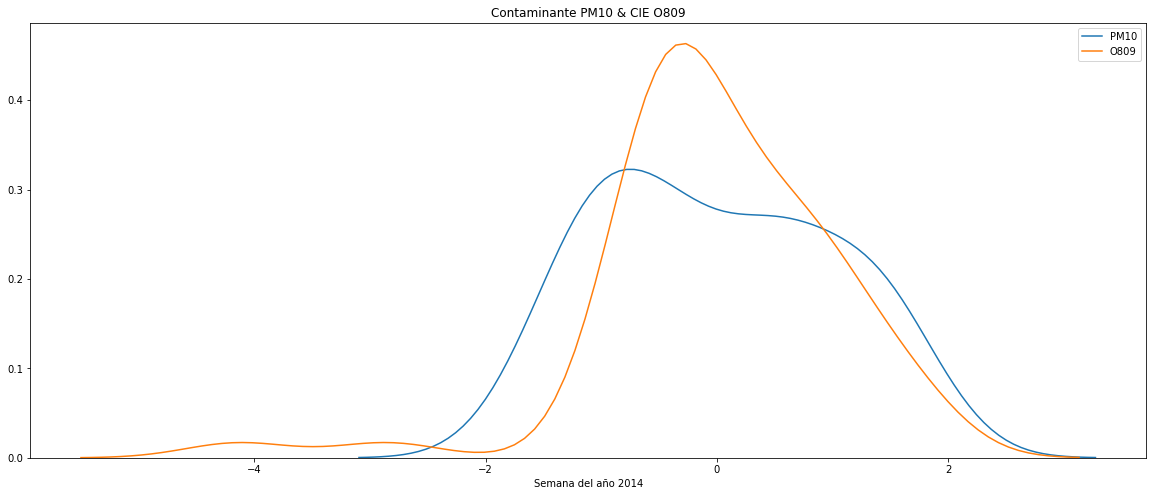


PM10 & O800


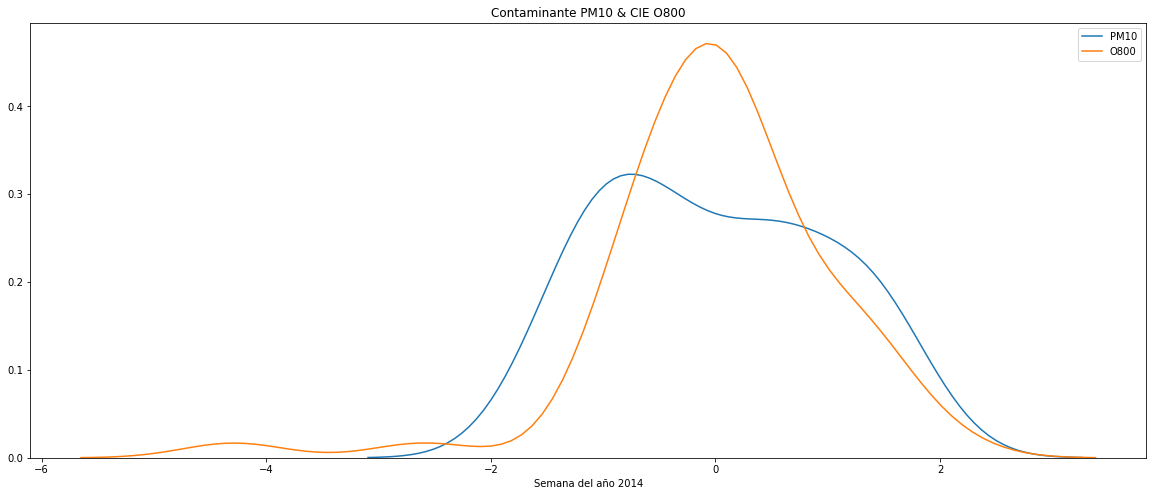


PM10 & N189


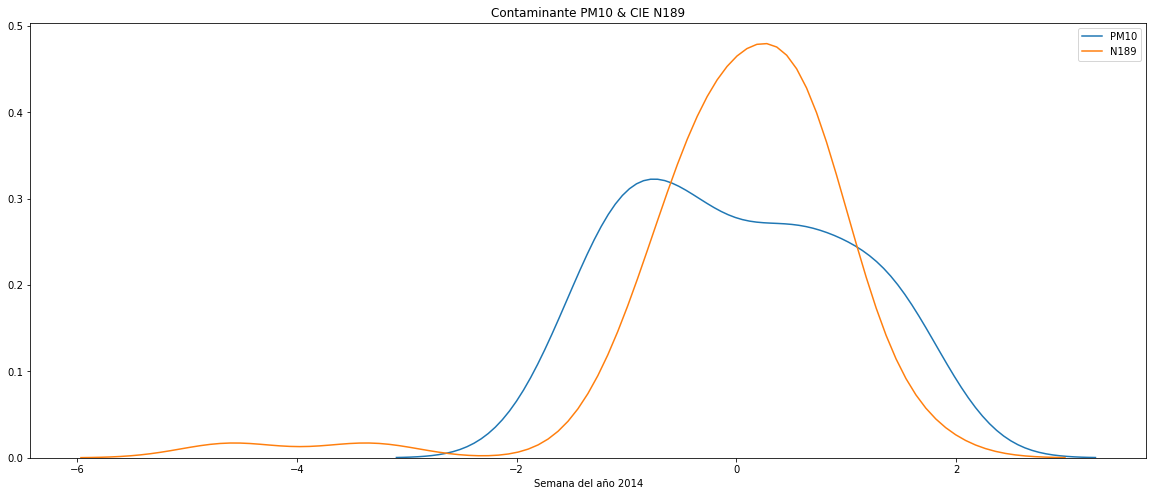


PM10 & O829


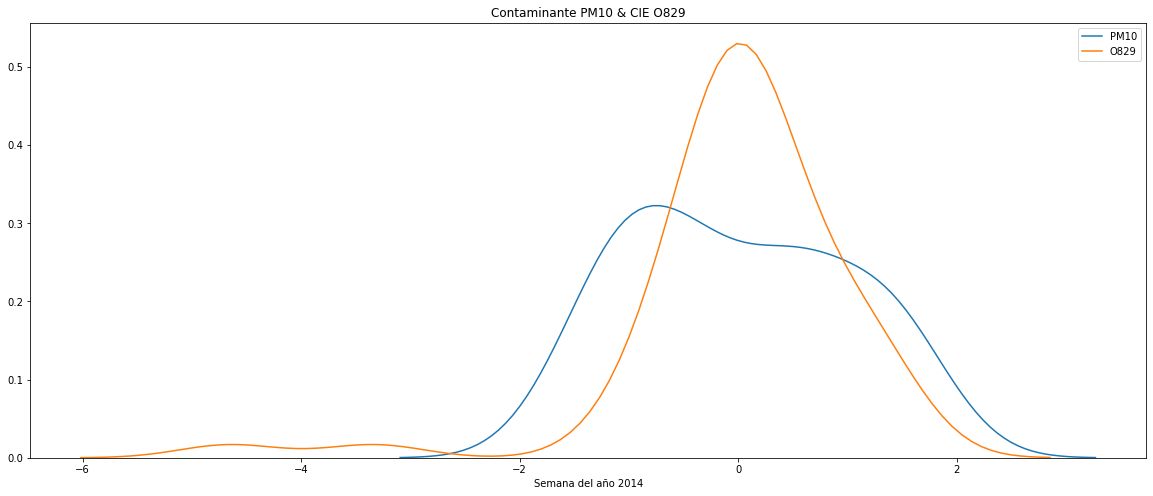


PM10 & O064


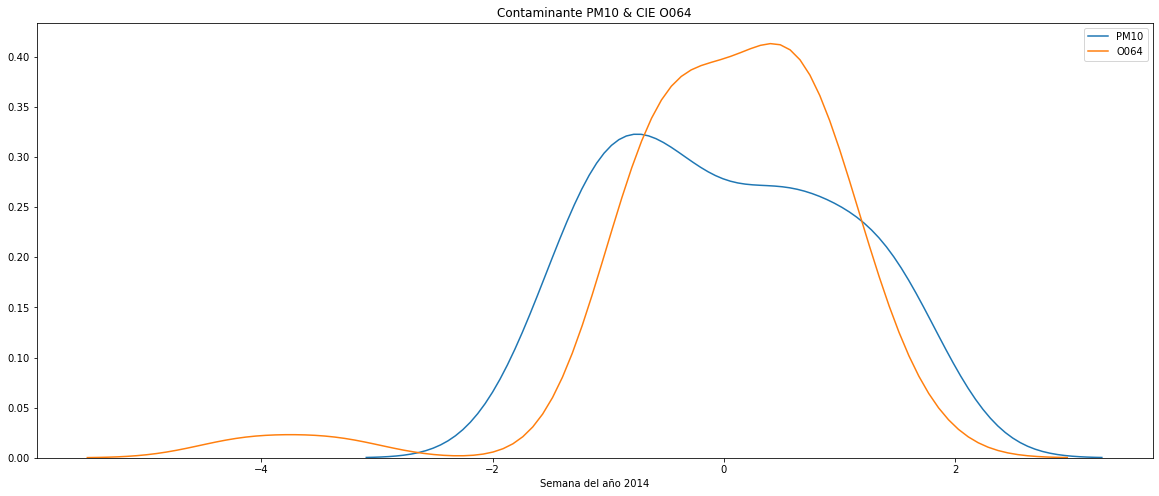


PM10 & O342


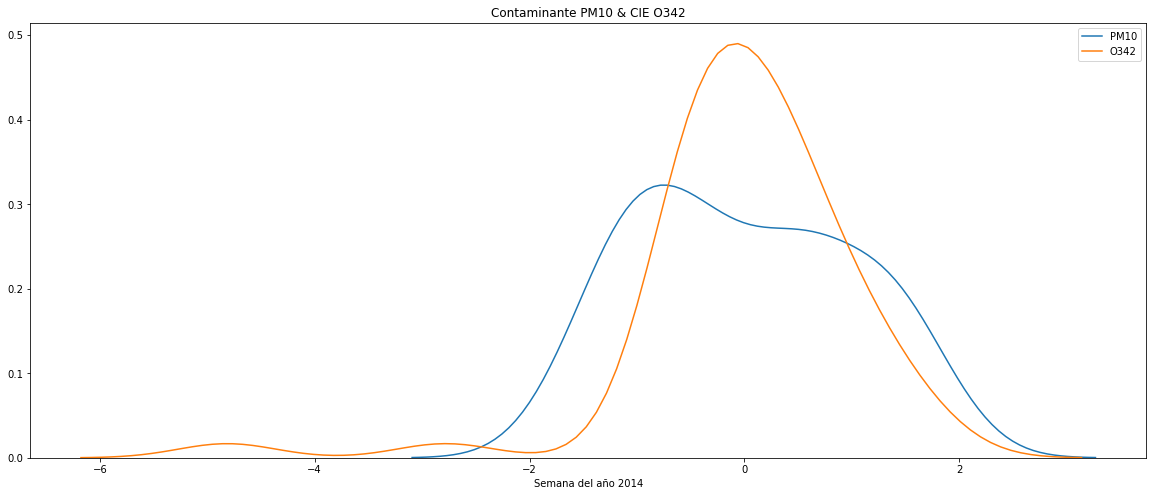


PM10 & N185


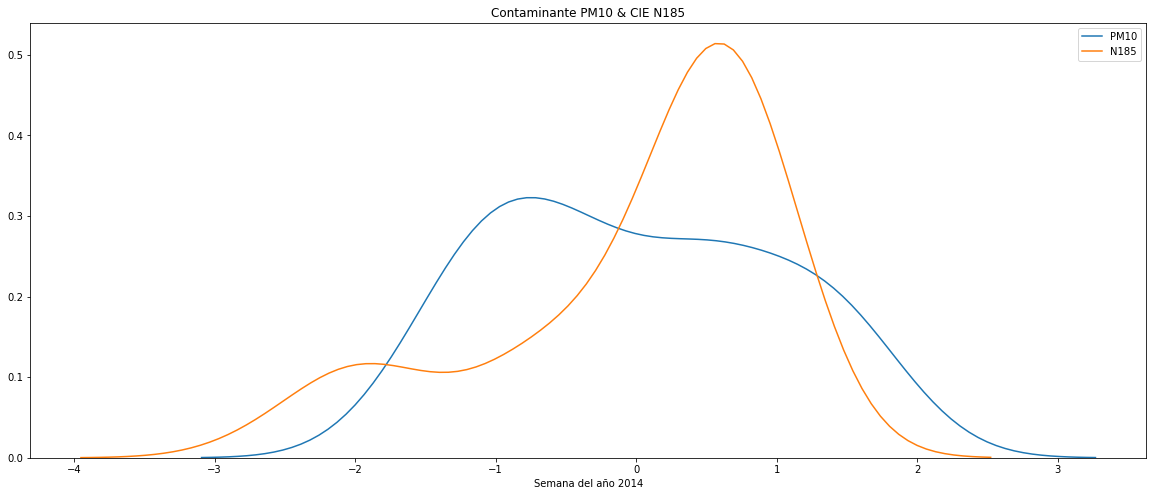


PM10 & H


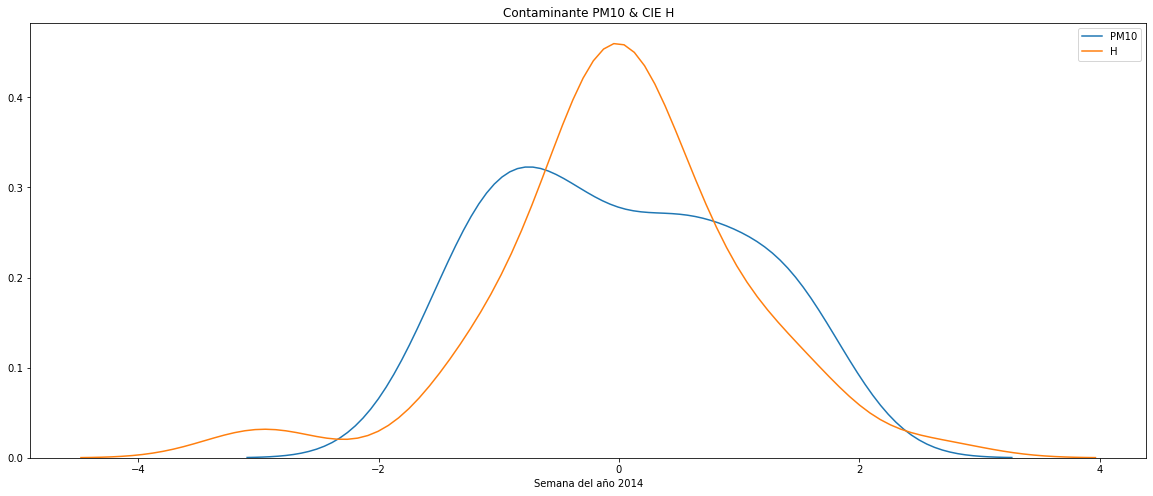


PM10 & I


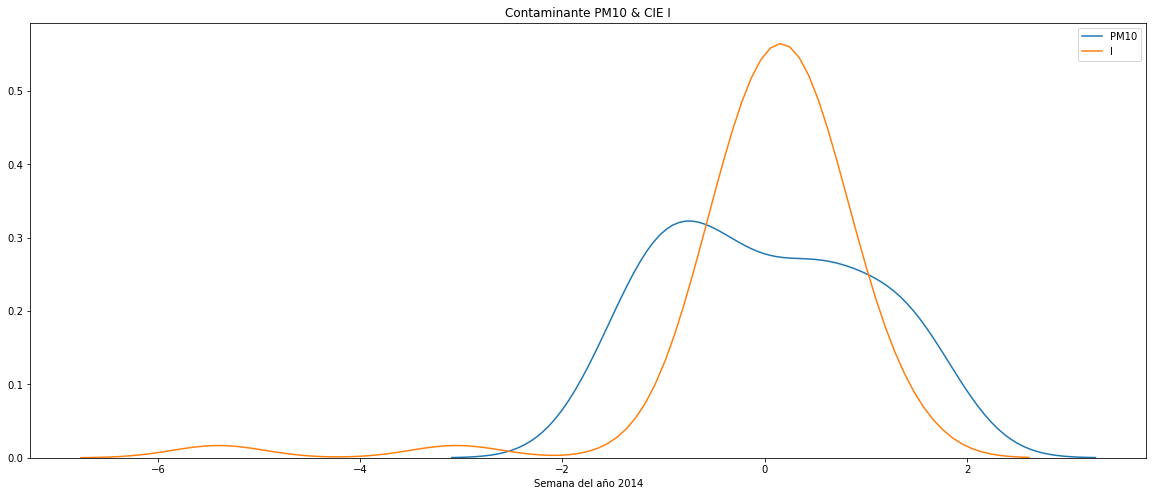


PM10 & J


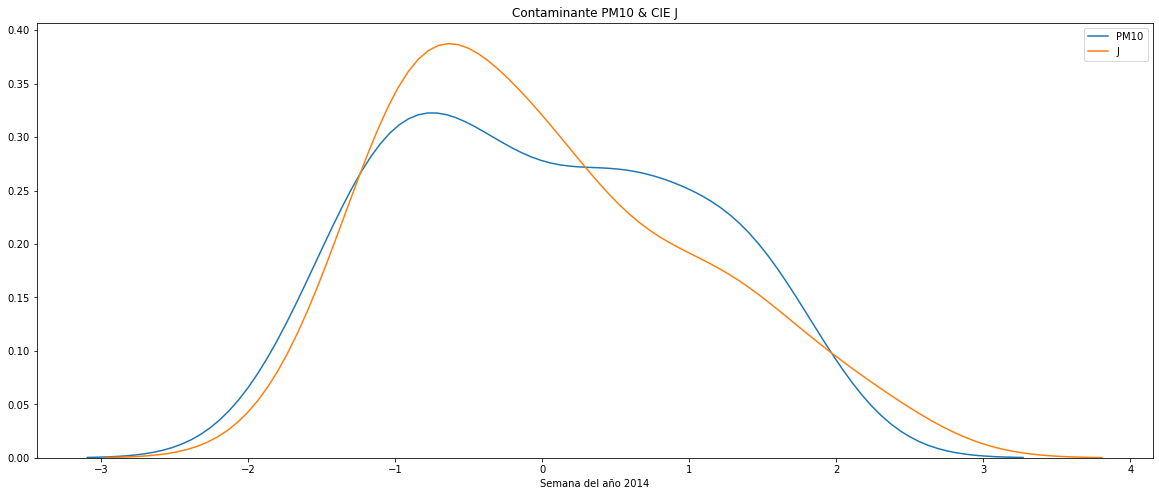

In [42]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2015)

In [43]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2015'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp  PM10
0      2015-01-01 00  37.0
1      2015-01-01 00  60.0
2      2015-01-01 00  26.0
3      2015-01-01 00  89.0
4      2015-01-01 00  66.0
...              ...   ...
79126  2015-12-31 23  49.0
79127  2015-12-31 23  37.0
79128  2015-12-31 23  42.0
79129  2015-12-31 23  74.0
79130  2015-12-31 23  60.0

[79131 rows x 2 columns]

In [44]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp  PM10
0     2015-01-01 00:00:00  37.0
1     2015-01-01 00:00:00  60.0
2     2015-01-01 00:00:00  26.0
3     2015-01-01 00:00:00  89.0
4     2015-01-01 00:00:00  66.0
...                   ...   ...
79126 2015-12-31 23:00:00  49.0
79127 2015-12-31 23:00:00  37.0
79128 2015-12-31 23:00:00  42.0
79129 2015-12-31 23:00:00  74.0
79130 2015-12-31 23:00:00  60.0

[79131 rows x 2 columns]

In [45]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp  PM10  sem
0     2015-01-01 00:00:00  37.0   53
1     2015-01-01 00:00:00  60.0   53
2     2015-01-01 00:00:00  26.0   53
3     2015-01-01 00:00:00  89.0   53
4     2015-01-01 00:00:00  66.0   53
...                   ...   ...  ...
79126 2015-12-31 23:00:00  49.0   52
79127 2015-12-31 23:00:00  37.0   52
79128 2015-12-31 23:00:00  42.0   52
79129 2015-12-31 23:00:00  74.0   52
79130 2015-12-31 23:00:00  60.0   52

[79131 rows x 3 columns]

In [46]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums, nrows=2500000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2015-01-03 00:00:00     C910
1        2015-01-03 00:00:00     C845
2        2015-01-03 00:00:00     C189
3        2015-01-03 00:00:00     C509
4        2015-01-03 00:00:00     C220
...                      ...      ...
2499995  2015-02-09 00:00:00     O410
2499996  2015-03-12 00:00:00     K811
2499997  2015-04-08 00:00:00     O809
2499998  2015-05-10 00:00:00     O054
2499999  2015-06-10 00:00:00     P240

[2500000 rows x 2 columns]

In [47]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2015-01-03     C910   53
1       2015-01-03     C845   53
2       2015-01-03     C189   53
3       2015-01-03     C509   53
4       2015-01-03     C220   53
...            ...      ...  ...
2463488 2015-02-09     O410    6
2463489 2015-03-12     K811   10
2463490 2015-04-08     O809   14
2463491 2015-05-10     O054   19
2463492 2015-06-10     P240   23

[2463493 rows x 3 columns]

In [48]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     44314
2     47507
3     48330
4     49381
5     46542
6     49035
7     48313
8     49213
9     48990
10    49905
11    46079
12    49712
13    44580
14    46364
15    47680
16    48058
17    47197
18    44426
19    47733
20    48187
21    48794
22    48484
23    48844
24    47430
25    46821
26    48245
27    49058
28    48403
29    48423
30    49374
31    49081
32    49114
33    49120
34    49473
35    49948
36    50555
37    46763
38    50028
39    50709
40    51615
41    49976
42    48570
43    49416
44    46316
45    49821
46    45952
47    49110
48    49021
49    47650
50    46348
51    35336
53    14149
Name: sem, dtype: int64

In [49]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem     PM10
0     1  68.9881
1     2  86.1762
2     3  94.6484
3     4  94.5687
4     5  72.8649
5     6  87.1936
6     7   97.137
7     8  64.9245
8     9  70.8009
9    10  71.3275
10   11  78.1242
11   12  87.7826
12   13  83.3896
13   14  75.1193
14   15  73.5007
15   16  75.5786
16   17  60.7288
17   18  69.1211
18   19   71.286
19   20  69.6247
20   21  75.7569
21   22  51.7399
22   23   50.568
23   24  58.4081
24   25  77.0542
25   26  67.4058
26   27  76.6186
27   28  72.9896
28   29  67.1158
29   30  70.5084
30   31  69.6112
31   32  60.2156
32   33  59.7668
33   34  51.6194
34   35  51.3974
35   36  55.7287
36   37  42.6784
37   38   43.096
38   39  56.6338
39   40  41.9092
40   41  51.9738
41   42  45.8644
42   43  61.2171
43   44  56.4057
44   45  48.7593
45   46  65.8017
46   47  47.7453
47   48  65.5709
48   49  98.9206
49   50  77.9882
50   51  100.017
51   53  83.3367


2015

PM10 & O809


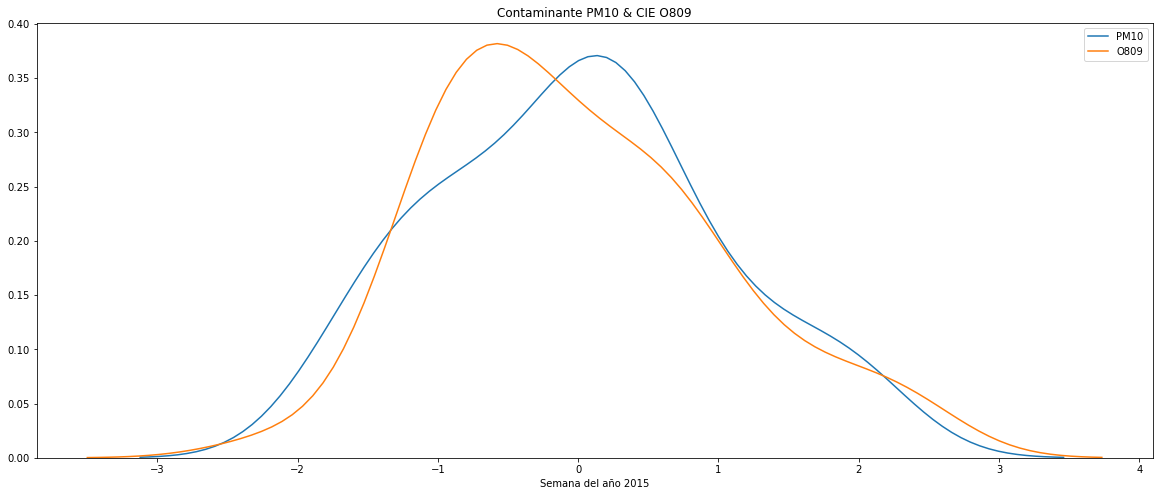


PM10 & N189


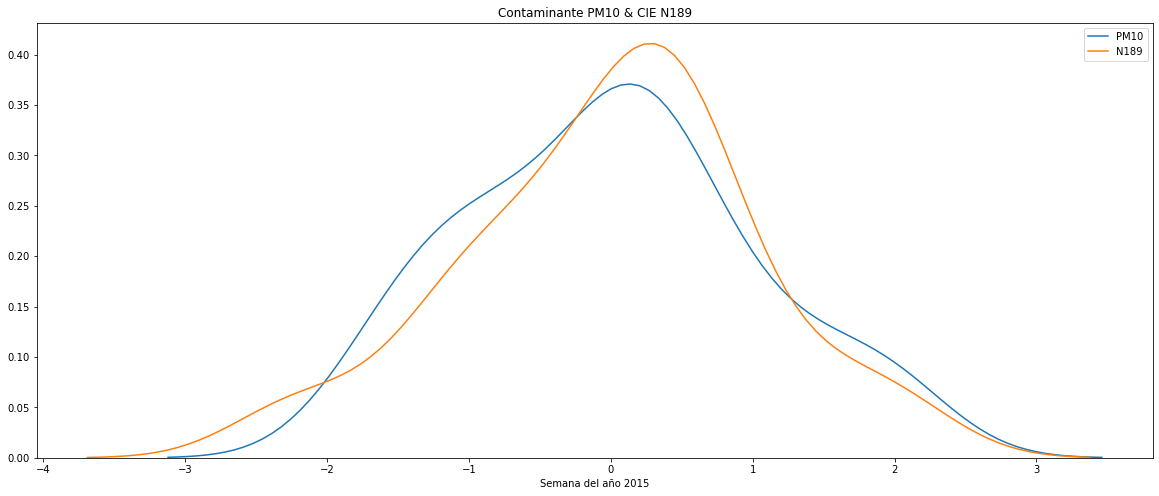


PM10 & O800


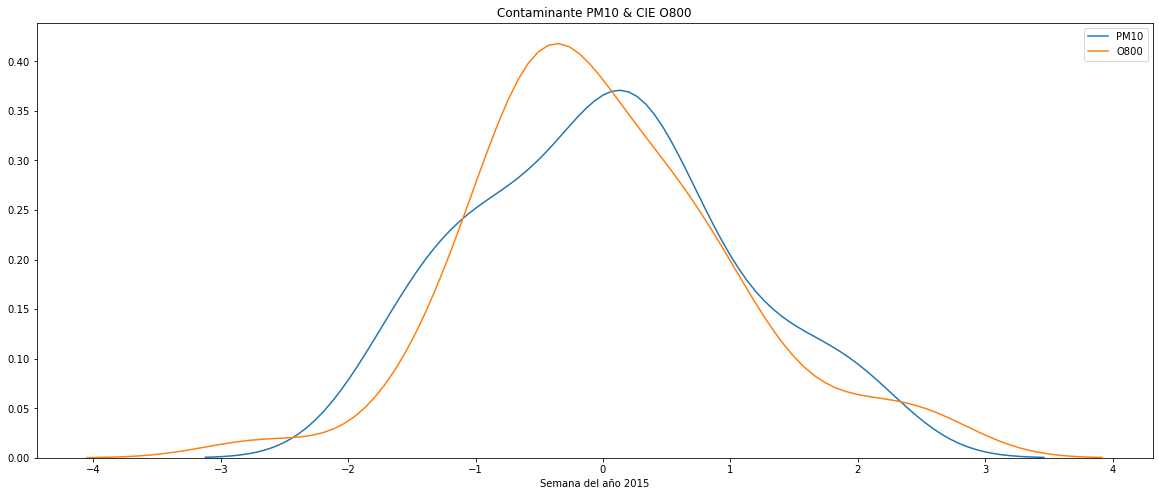


PM10 & O829


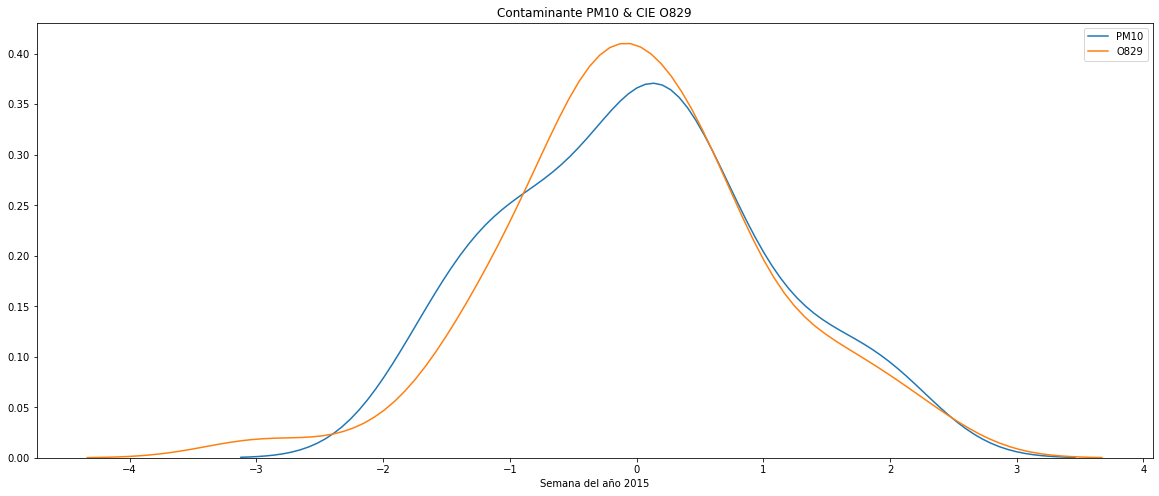


PM10 & O064


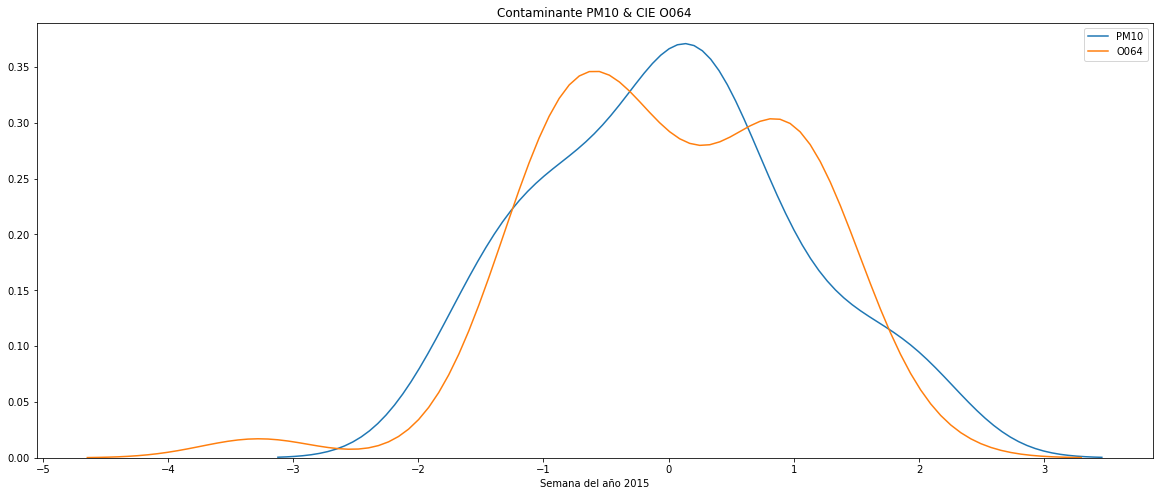


PM10 & O342


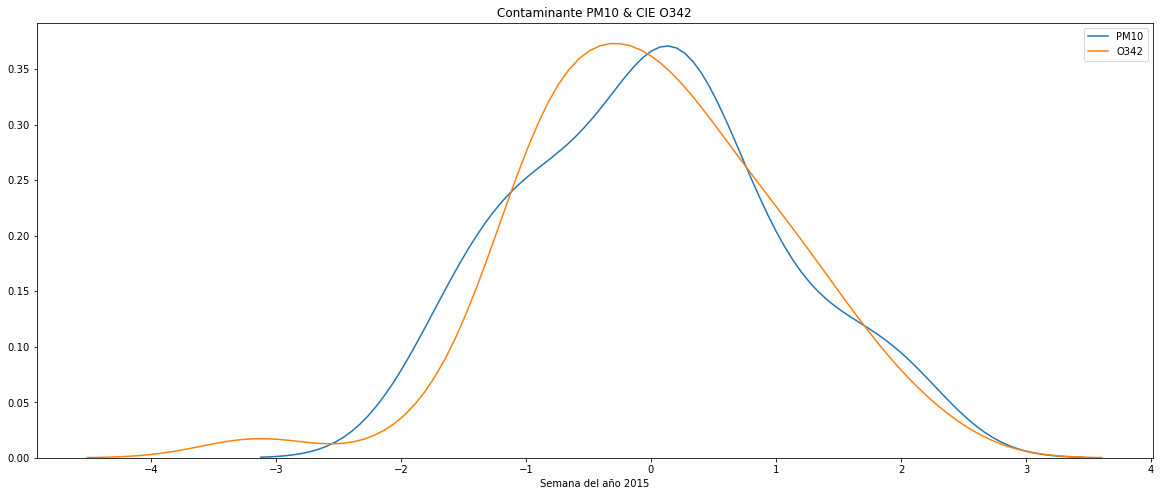


PM10 & K358


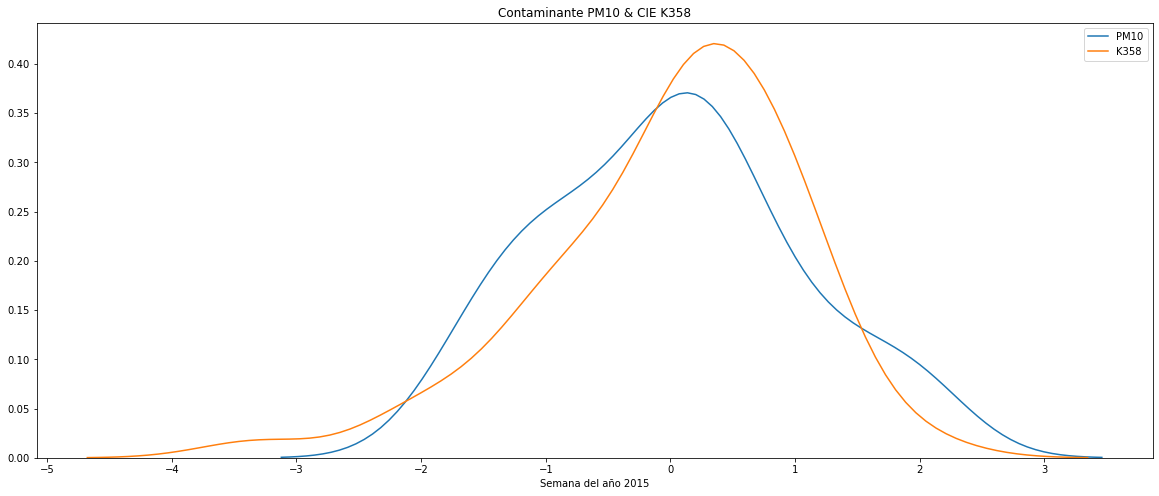


PM10 & H


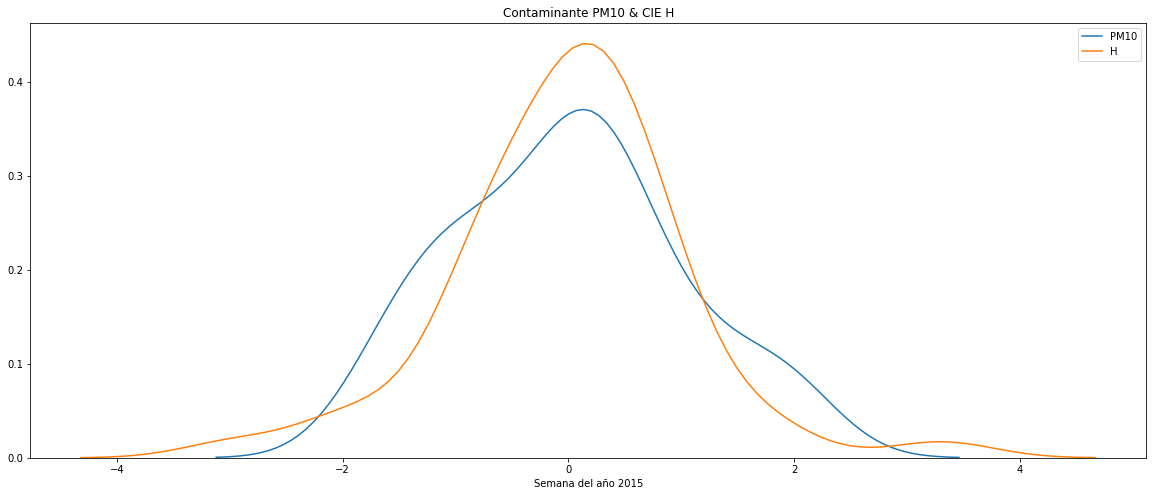


PM10 & I


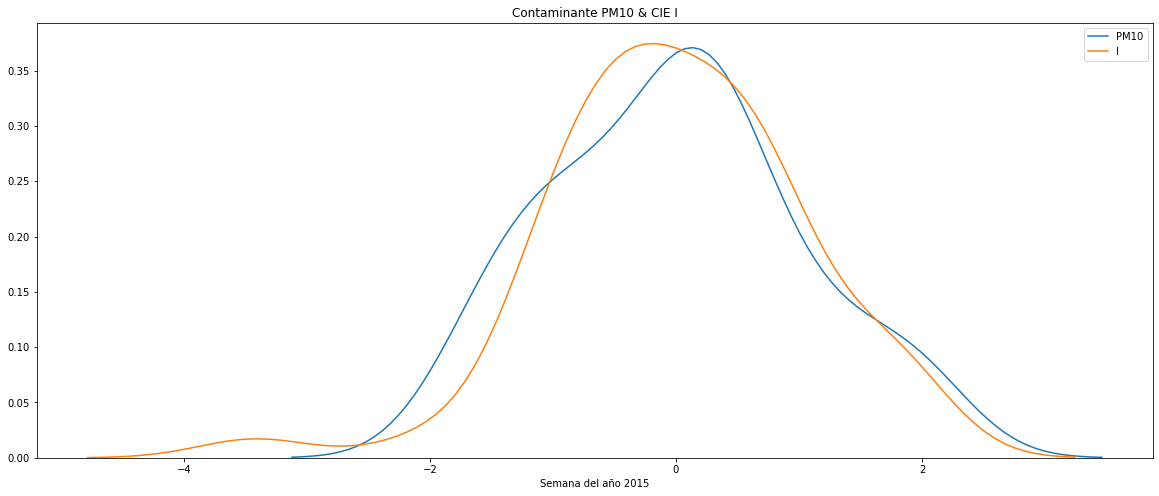


PM10 & J


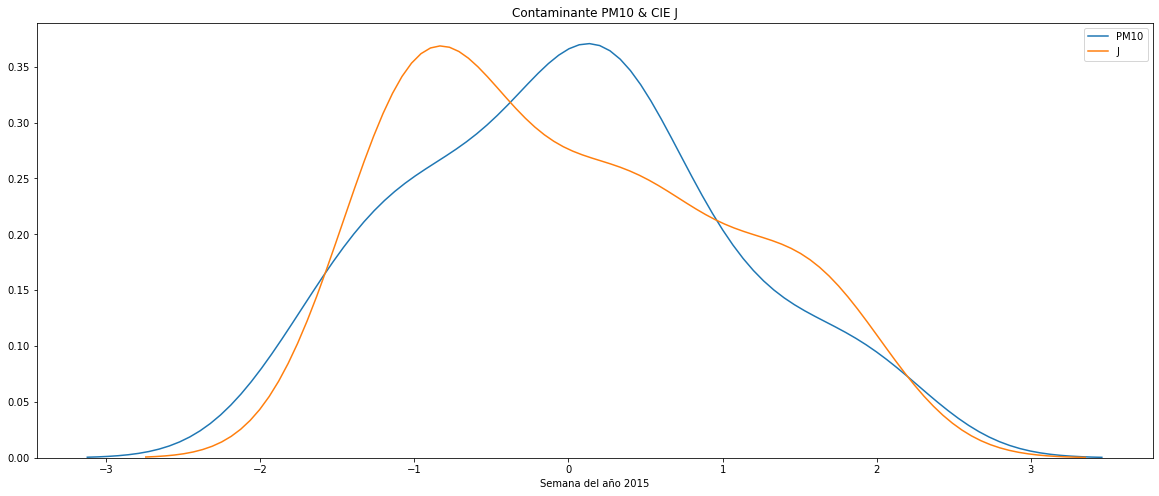

In [50]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2016)

In [51]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2016'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   PM10
0      2016-01-01 00   49.0
1      2016-01-01 00  109.0
2      2016-01-01 00   84.0
3      2016-01-01 00  102.0
4      2016-01-01 00   82.0
...              ...    ...
84267  2016-12-31 23  149.0
84268  2016-12-31 23  143.0
84269  2016-12-31 23  280.0
84270  2016-12-31 23  364.0
84271  2016-12-31 23  135.0

[84272 rows x 2 columns]

In [52]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   PM10
0     2016-01-01 00:00:00   49.0
1     2016-01-01 00:00:00  109.0
2     2016-01-01 00:00:00   84.0
3     2016-01-01 00:00:00  102.0
4     2016-01-01 00:00:00   82.0
...                   ...    ...
84267 2016-12-31 23:00:00  149.0
84268 2016-12-31 23:00:00  143.0
84269 2016-12-31 23:00:00  280.0
84270 2016-12-31 23:00:00  364.0
84271 2016-12-31 23:00:00  135.0

[84272 rows x 2 columns]

In [53]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   PM10  sem
0     2016-01-01 00:00:00   49.0   52
1     2016-01-01 00:00:00  109.0   52
2     2016-01-01 00:00:00   84.0   52
3     2016-01-01 00:00:00  102.0   52
4     2016-01-01 00:00:00   82.0   52
...                   ...    ...  ...
84267 2016-12-31 23:00:00  149.0   52
84268 2016-12-31 23:00:00  143.0   52
84269 2016-12-31 23:00:00  280.0   52
84270 2016-12-31 23:00:00  364.0   52
84271 2016-12-31 23:00:00  135.0   52

[84272 rows x 3 columns]

In [54]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        12/30/2015 00:00     N185
1        12/31/2015 00:00     N185
2        12/31/2015 00:00     N185
3        01/02/2016 00:00     N185
4        01/02/2016 00:00     N185
...                   ...      ...
1048570  08/24/2016 00:00     E115
1048571  08/17/2016 00:00     O809
1048572  08/21/2016 00:00     O809
1048573  08/22/2016 00:00     O809
1048574  08/19/2016 00:00     O809

[1048574 rows x 2 columns]

In [55]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%m/%d/%Y %H:%M'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2016-01-02     N185   52
1       2016-01-02     N185   52
2       2016-01-02     N185   52
3       2016-01-02     N185   52
4       2016-01-02     N185   52
...            ...      ...  ...
1032801 2016-08-24     E115   34
1032802 2016-08-17     O809   33
1032803 2016-08-21     O809   34
1032804 2016-08-22     O809   34
1032805 2016-08-19     O809   33

[1032806 rows x 3 columns]

In [56]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17589
2     19491
3     19832
4     20191
5     19086
6     20157
7     19888
8     20511
9     20626
10    20529
11    20988
12    17365
13    19319
14    20001
15    20455
16    19735
17    20120
18    19200
19    19319
20    19965
21    20731
22    19958
23    20423
24    20138
25    19626
26    19910
27    20014
28    20014
29    20375
30    20131
31    20075
32    20357
33    20336
34    20555
35    20810
36    21251
37    20265
38    21211
39    21159
40    20842
41    20627
42    20497
43    20288
44    18737
45    19961
46    19748
47    18405
48    19142
49    18985
50    18585
51    18338
52    16945
Name: sem, dtype: int64

In [57]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem     PM10
0     1  54.3988
1     2  63.9636
2     3  68.8932
3     4  74.9094
4     5  64.9839
5     6  73.4169
6     7  76.7703
7     8   62.565
8     9  63.0406
9    10  56.0551
10   11  72.8455
11   12  54.9278
12   13  67.6261
13   14  53.1759
14   15  55.1794
15   16  54.9008
16   17  90.1165
17   18  54.7155
18   19  65.9614
19   20  48.1057
20   21  75.2927
21   22  51.2287
22   23  50.4336
23   24  64.7775
24   25  52.8401
25   26  53.3903
26   27   65.321
27   28  84.0565
28   29  42.7892
29   30  49.6101
30   31  53.8586
31   32  53.3835
32   33  43.2088
33   34  46.9776
34   35  41.7385
35   36  57.5596
36   37  44.6805
37   38  47.8282
38   39  44.5228
39   40  58.6023
40   41  53.1069
41   42  63.6296
42   43  52.9639
43   44  47.7766
44   45  40.3668
45   46  79.2098
46   47  68.7346
47   48  68.5785
48   49    53.99
49   50  90.4433
50   51  94.7691
51   52  69.7427


2016

PM10 & O809


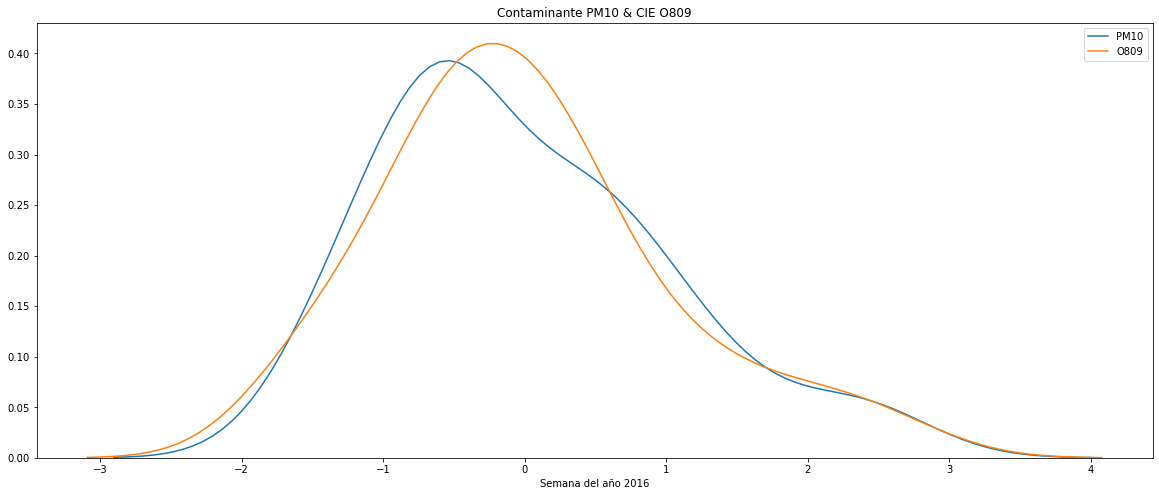


PM10 & O800


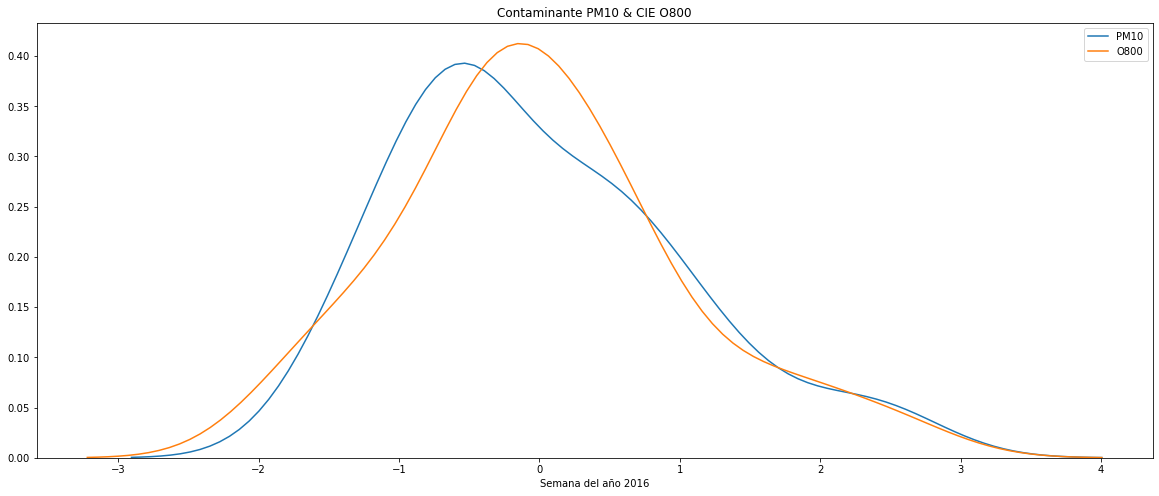


PM10 & O829


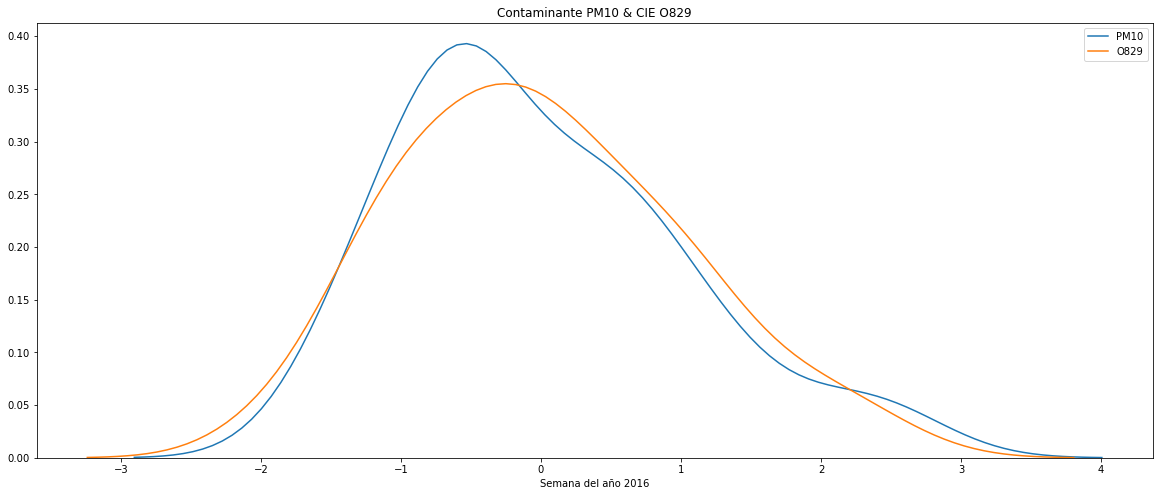


PM10 & O064


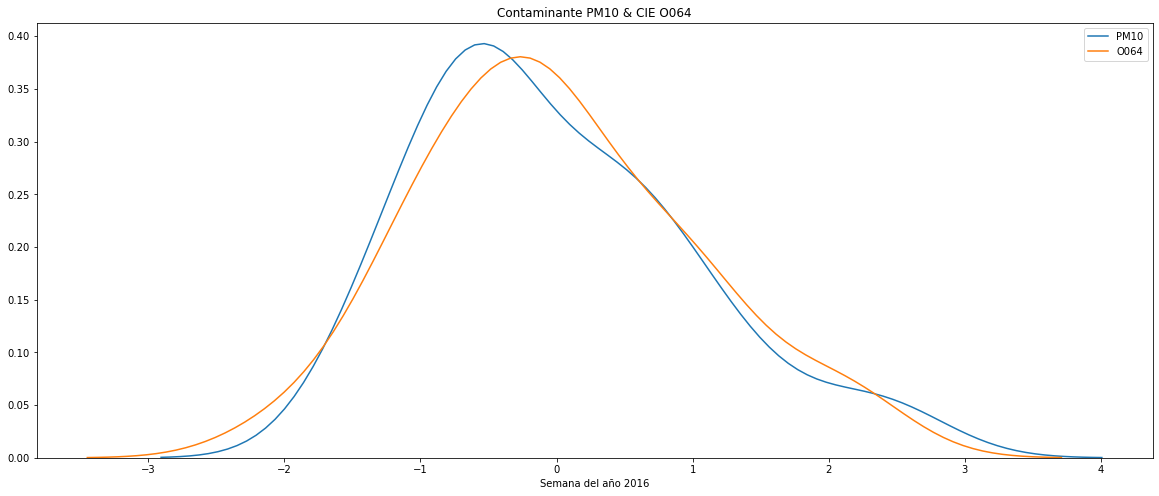


PM10 & N189


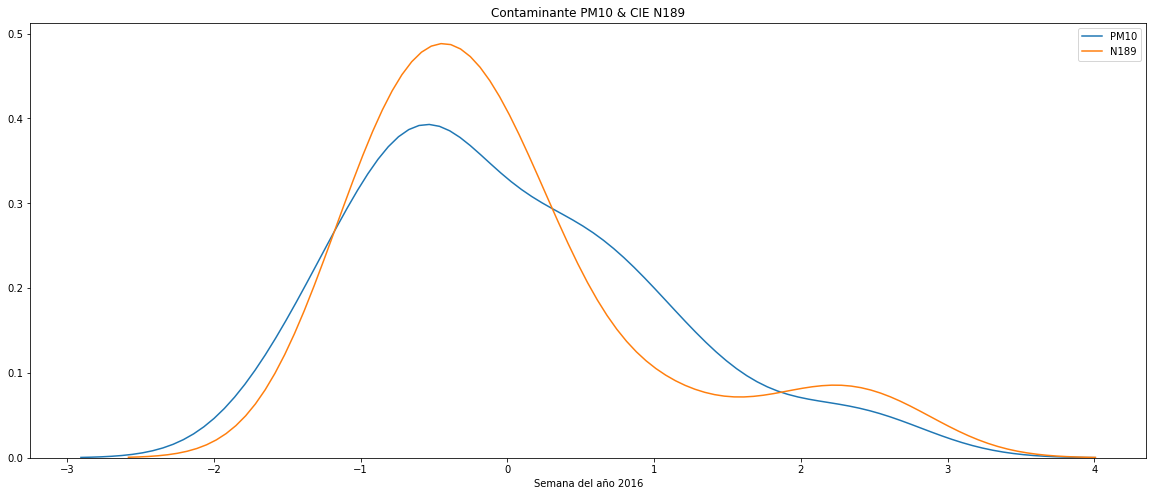


PM10 & O342


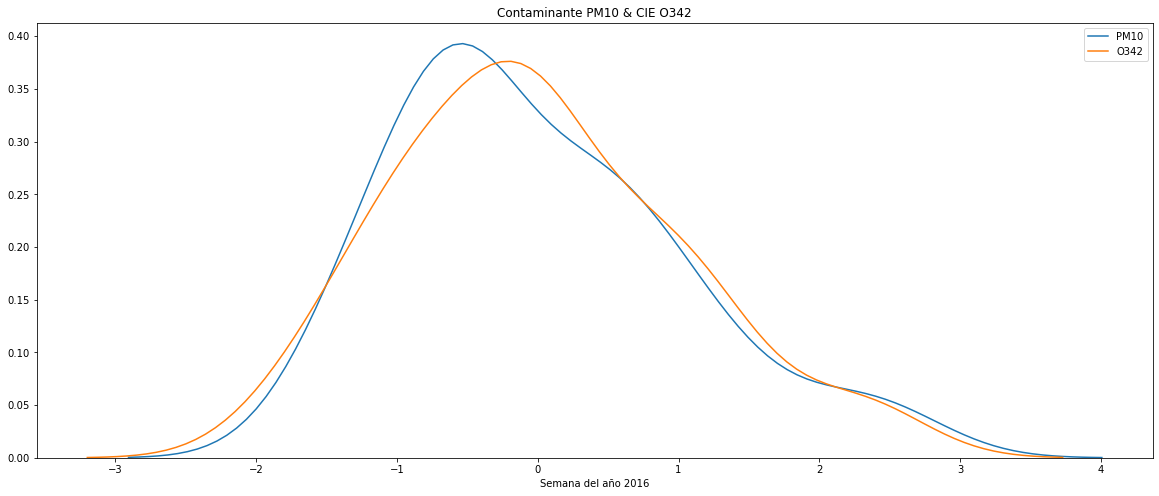


PM10 & K358


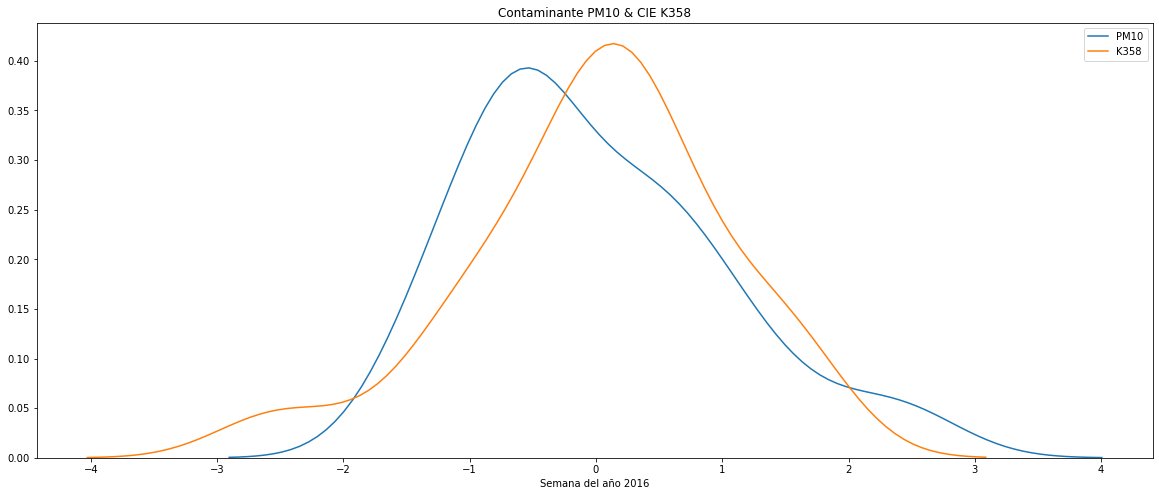


PM10 & H


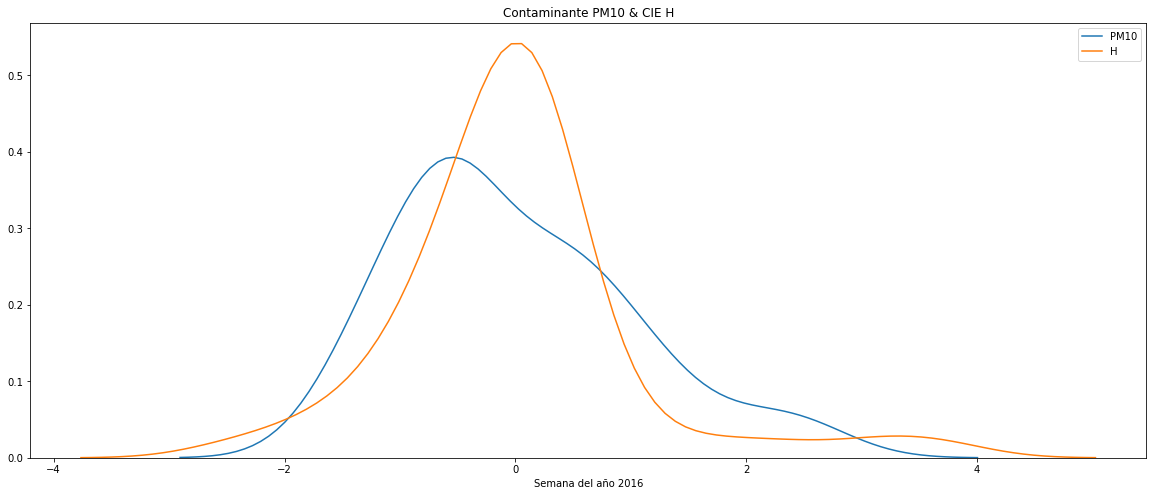


PM10 & I


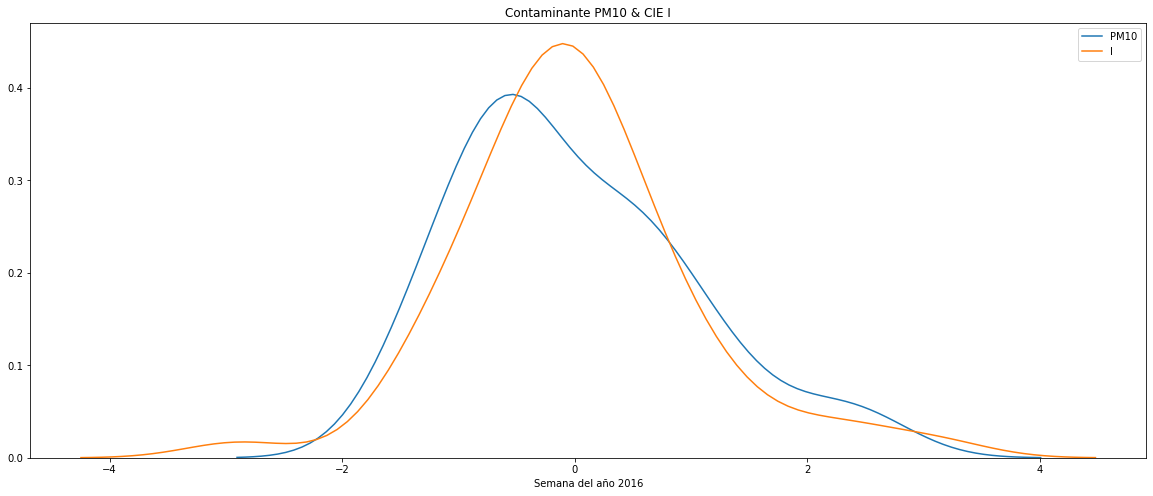


PM10 & J


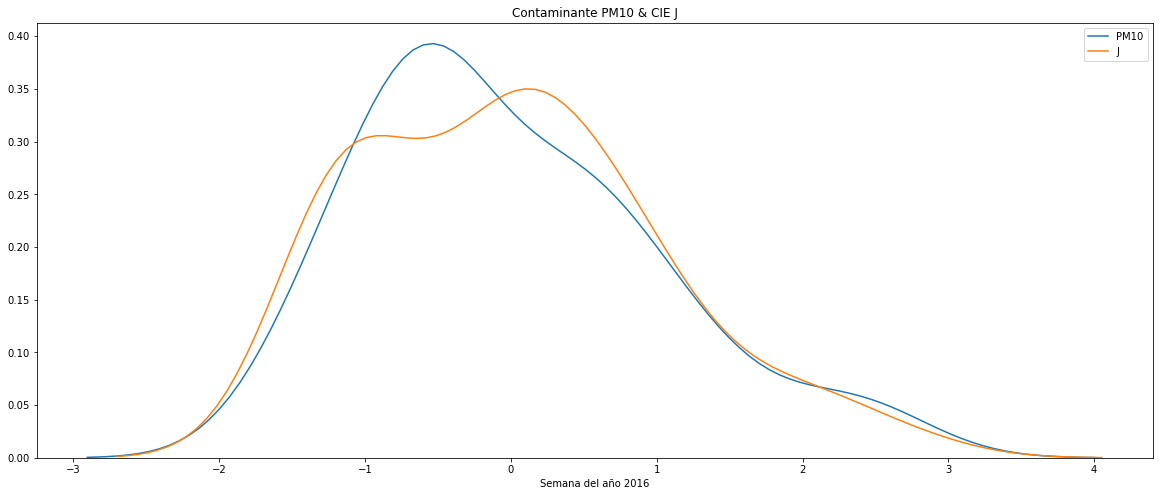

In [58]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2017)

In [59]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2017'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   PM10
0      2017-01-01 00  206.0
1      2017-01-01 00  487.0
2      2017-01-01 00  143.0
3      2017-01-01 00  241.0
4      2017-01-01 00  112.0
...              ...    ...
91464  2017-12-31 23    9.0
91465  2017-12-31 23   16.0
91466  2017-12-31 23   27.0
91467  2017-12-31 23    6.0
91468  2017-12-31 23   19.0

[91469 rows x 2 columns]

In [60]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   PM10
0     2017-01-01 00:00:00  206.0
1     2017-01-01 00:00:00  487.0
2     2017-01-01 00:00:00  143.0
3     2017-01-01 00:00:00  241.0
4     2017-01-01 00:00:00  112.0
...                   ...    ...
91464 2017-12-31 23:00:00    9.0
91465 2017-12-31 23:00:00   16.0
91466 2017-12-31 23:00:00   27.0
91467 2017-12-31 23:00:00    6.0
91468 2017-12-31 23:00:00   19.0

[91469 rows x 2 columns]

In [61]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   PM10  sem
0     2017-01-01 00:00:00  206.0    1
1     2017-01-01 00:00:00  487.0    1
2     2017-01-01 00:00:00  143.0    1
3     2017-01-01 00:00:00  241.0    1
4     2017-01-01 00:00:00  112.0    1
...                   ...    ...  ...
91464 2017-12-31 23:00:00    9.0    1
91465 2017-12-31 23:00:00   16.0    1
91466 2017-12-31 23:00:00   27.0    1
91467 2017-12-31 23:00:00    6.0    1
91468 2017-12-31 23:00:00   19.0    1

[91469 rows x 3 columns]

In [62]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, sep='|', usecols=colums, nrows=1500000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2017-02-13 00:00:00     O809
1        2017-03-12 00:00:00     O809
2        2017-04-12 00:00:00     E86X
3        2017-05-13 00:00:00     O809
4        2017-06-14 00:00:00     I219
...                      ...      ...
1499995  2017-08-04 00:00:00     O809
1499996  2017-08-04 00:00:00     O809
1499997  2017-08-04 00:00:00     O064
1499998  2017-08-04 00:00:00     O064
1499999  2017-08-04 00:00:00     O064

[1500000 rows x 2 columns]

In [63]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2017-02-13     O809    7
1       2017-03-12     O809   11
2       2017-04-12     E86X   15
3       2017-05-13     O809   19
4       2017-06-14     I219   24
...            ...      ...  ...
1499995 2017-08-04     O809   31
1499996 2017-08-04     O809   31
1499997 2017-08-04     O064   31
1499998 2017-08-04     O064   31
1499999 2017-08-04     O064   31

[1500000 rows x 3 columns]

In [64]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     29887
2     30924
3     32383
4     32156
5     32001
6     30230
7     32552
8     31518
9     31718
10    32476
11    31829
12    29294
13    29940
14    28557
15    26151
16    26885
17    27700
18    24600
19    26186
20    27410
21    27306
22    26797
23    27708
24    28105
25    27789
26    27284
27    27648
28    27696
29    27579
30    26725
31    27417
32    28836
33    28370
34    28507
35    29005
36    29782
37    30581
38    30630
39    29696
40    30454
41    30531
42    30724
43    30116
44    28700
45    30153
46    30218
47    26720
48    28416
49    28652
50    27196
51    25701
52    20561
Name: sem, dtype: int64

In [65]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem     PM10
0     1  67.1804
1     2   91.762
2     3  82.2252
3     4  72.1496
4     5  91.4721
5     6  91.5009
6     7  65.5354
7     8   72.398
8     9  71.8207
9    10  60.3703
10   11  61.7706
11   12  71.2654
12   13  86.4536
13   14  71.6046
14   15  49.5027
15   16  59.1426
16   17    75.78
17   18  67.6869
18   19  63.7745
19   20  71.0156
20   21  62.0121
21   22  48.1596
22   23  54.9772
23   24  56.6895
24   25  61.6839
25   26  49.9688
26   27  52.7858
27   28  41.9578
28   29  48.2677
29   30  61.0902
30   31   52.869
31   32  48.8117
32   33  57.3679
33   34   44.086
34   35  48.0089
35   36  42.1709
36   37  65.5382
37   38  40.9192
38   39  28.2728
39   40  42.5403
40   41  49.0384
41   42  60.7946
42   43  70.6258
43   44  88.2956
44   45  62.4867
45   46  77.8097
46   47  81.2842
47   48  69.9675
48   49  55.3042
49   50  81.8571
50   51  115.668
51   52  67.4171


2017

PM10 & O809


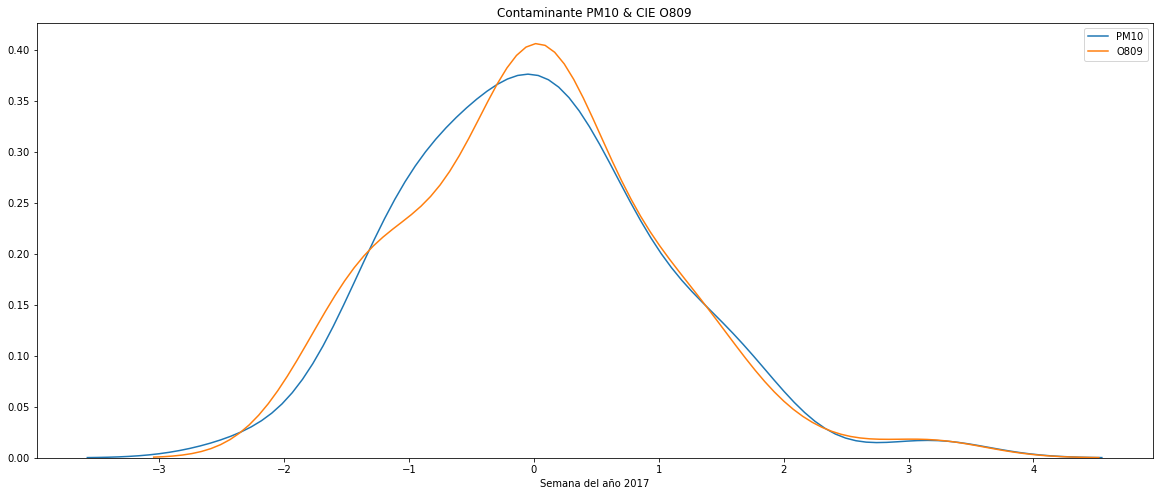


PM10 & N189


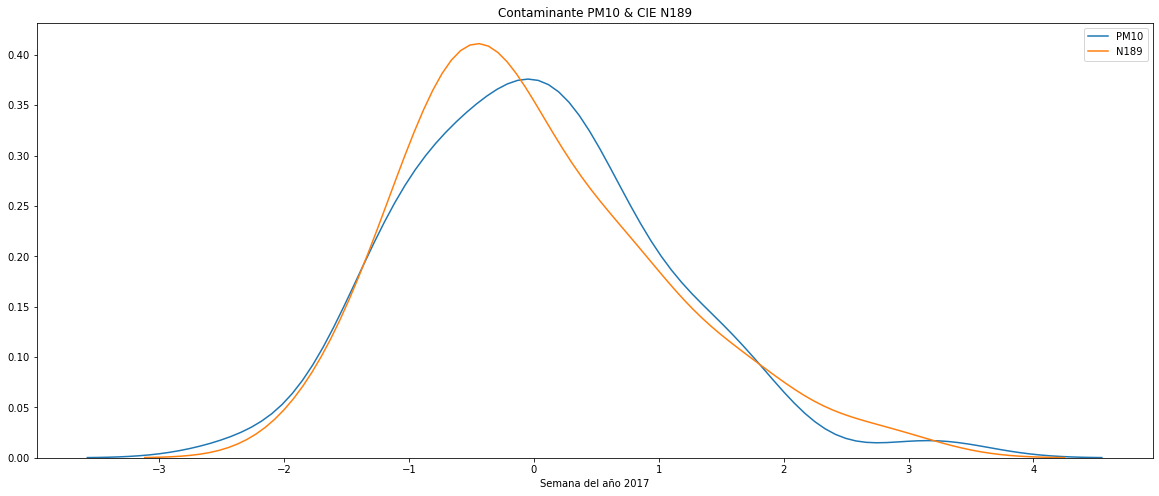


PM10 & O800


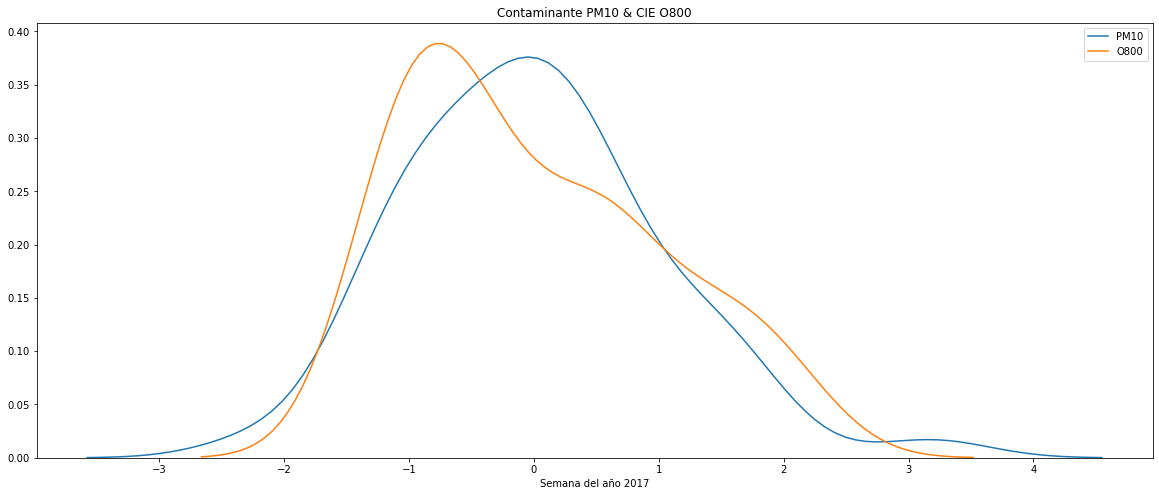


PM10 & O829


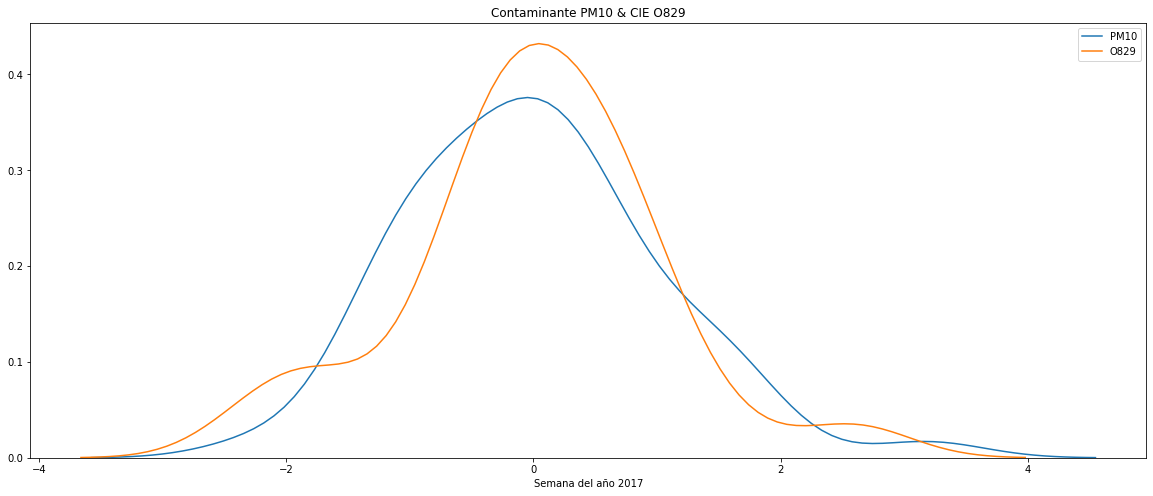


PM10 & O064


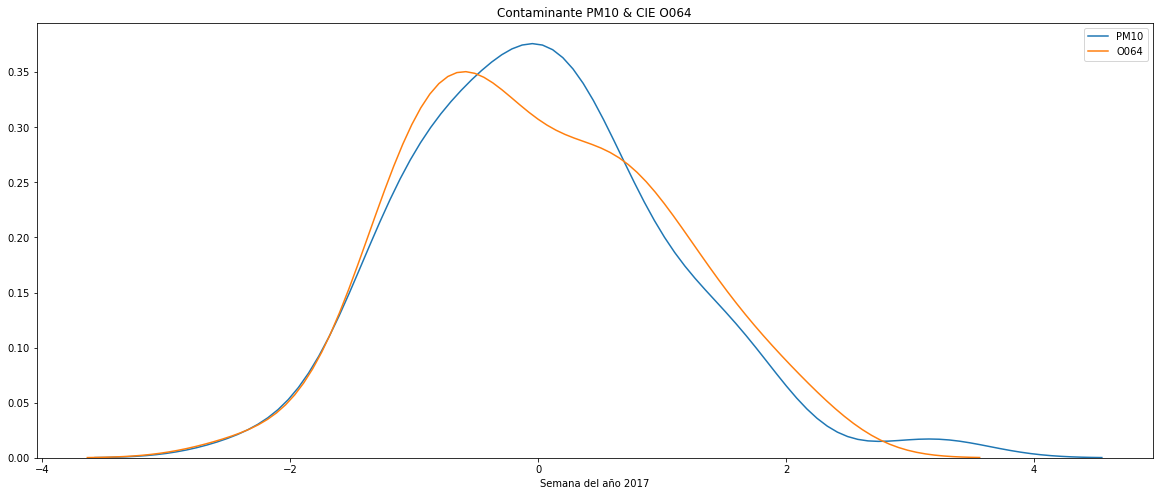


PM10 & N185


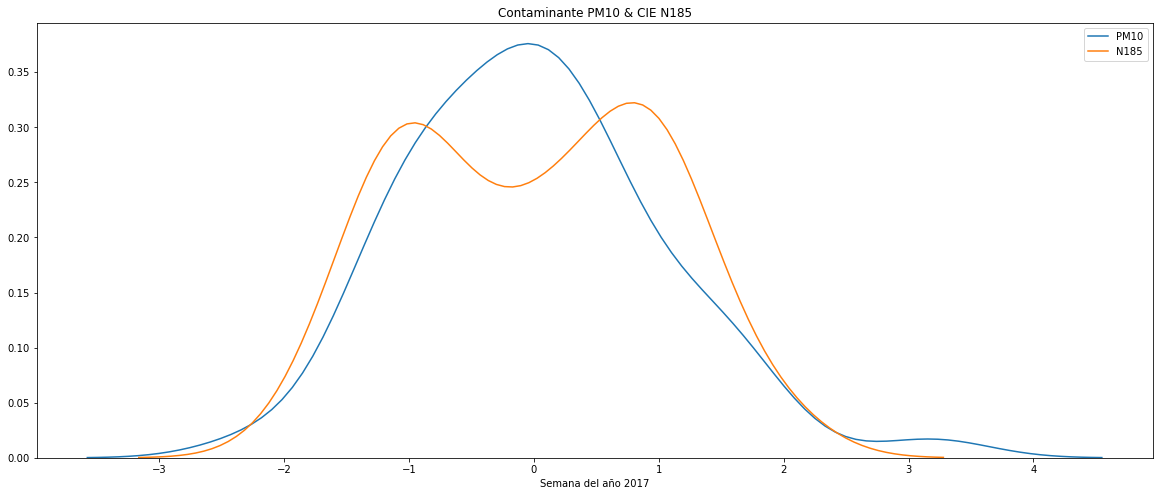


PM10 & C509


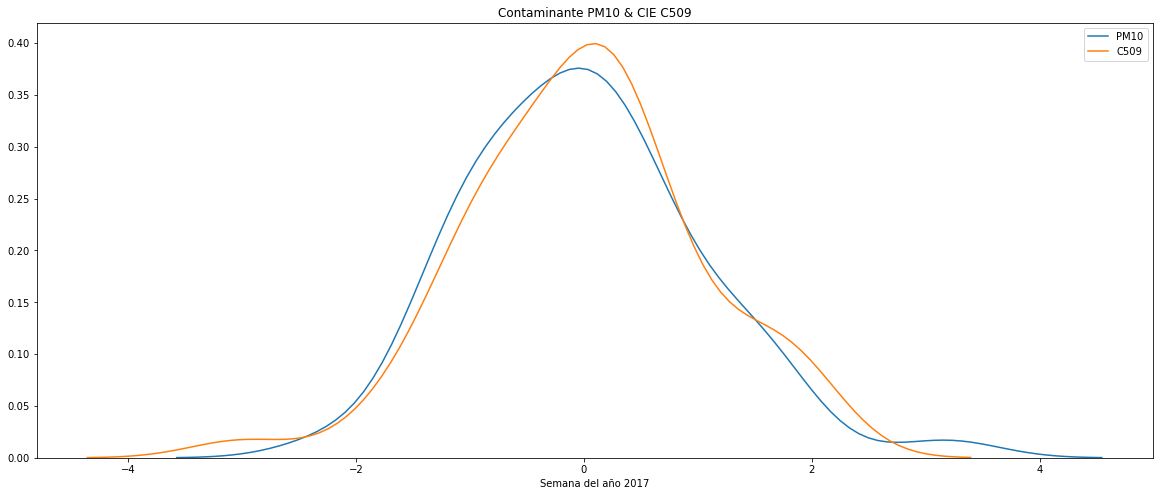


PM10 & H


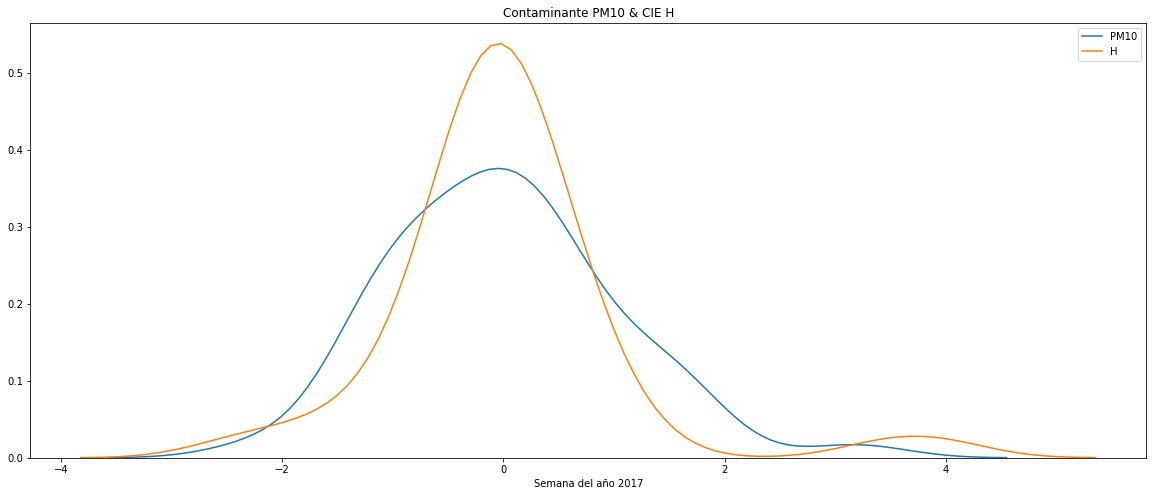


PM10 & I


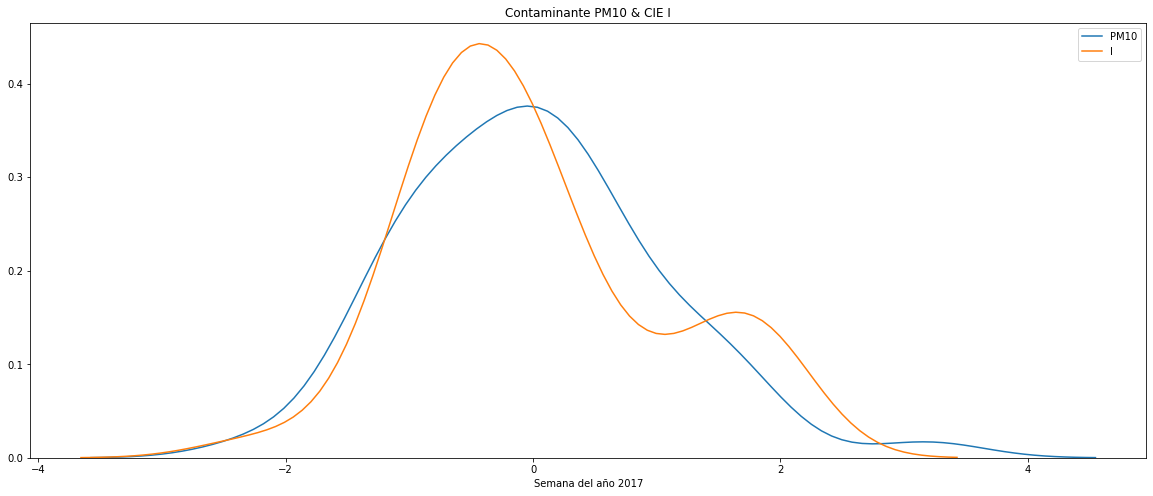


PM10 & J


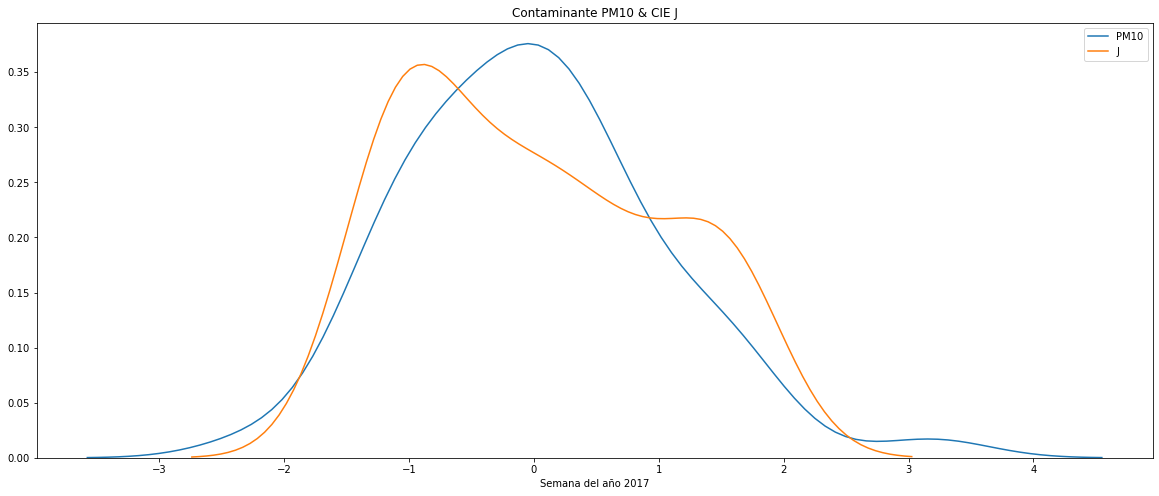

In [66]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2018)

In [67]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2018'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   PM10
0       2018-01-01 01   34.0
1       2018-01-01 01   38.0
2       2018-01-01 01   16.0
3       2018-01-01 01   27.0
4       2018-01-01 01   29.0
...               ...    ...
107918  2018-12-31 23  445.0
107919  2018-12-31 23  134.0
107920  2018-12-31 23  392.0
107921  2018-12-31 23   40.0
107922  2018-12-31 23  103.0

[107923 rows x 2 columns]

In [68]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   PM10
0      2018-01-01 01:00:00   34.0
1      2018-01-01 01:00:00   38.0
2      2018-01-01 01:00:00   16.0
3      2018-01-01 01:00:00   27.0
4      2018-01-01 01:00:00   29.0
...                    ...    ...
107918 2018-12-31 23:00:00  445.0
107919 2018-12-31 23:00:00  134.0
107920 2018-12-31 23:00:00  392.0
107921 2018-12-31 23:00:00   40.0
107922 2018-12-31 23:00:00  103.0

[107923 rows x 2 columns]

In [69]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   PM10  sem
0      2018-01-01 01:00:00   34.0    1
1      2018-01-01 01:00:00   38.0    1
2      2018-01-01 01:00:00   16.0    1
3      2018-01-01 01:00:00   27.0    1
4      2018-01-01 01:00:00   29.0    1
...                    ...    ...  ...
107918 2018-12-31 23:00:00  445.0    1
107919 2018-12-31 23:00:00  134.0    1
107920 2018-12-31 23:00:00  392.0    1
107921 2018-12-31 23:00:00   40.0    1
107922 2018-12-31 23:00:00  103.0    1

[107923 rows x 3 columns]

In [70]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums, nrows=1000000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0       2018-03-11 00:00:00.000     Z524
1       2018-03-15 00:00:00.000     D259
2       2018-04-07 00:00:00.000     M169
3       2018-04-06 00:00:00.000     Q539
4       2018-04-19 00:00:00.000     N185
...                         ...      ...
999995  2018-04-24 00:00:00.000     E042
999996  2018-04-24 00:00:00.000     K802
999997  2018-04-27 00:00:00.000     K603
999998  2018-04-28 00:00:00.000     R69X
999999  2018-04-26 00:00:00.000     M179

[1000000 rows x 2 columns]

In [71]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S.000'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0      2018-03-11     Z524   11
1      2018-03-15     D259   11
2      2018-04-07     M169   14
3      2018-04-06     Q539   14
4      2018-04-19     N185   16
...           ...      ...  ...
999995 2018-04-24     E042   17
999996 2018-04-24     K802   17
999997 2018-04-27     K603   17
999998 2018-04-28     R69X   17
999999 2018-04-26     M179   17

[1000000 rows x 3 columns]

In [72]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17995
2     18415
3     19382
4     19381
5     19586
6     18117
7     19495
8     19463
9     19664
10    19664
11    20214
12    19257
13    17852
14    18507
15    19268
16    19680
17    19987
18    18283
19    19175
20    19921
21    20048
22    19846
23    19602
24    19141
25    18905
26    18857
27    19181
28    19413
29    19496
30    19698
31    19275
32    19323
33    19547
34    19931
35    19964
36    20534
37    20509
38    20569
39    19922
40    20303
41    19961
42    19705
43    19605
44    18409
45    19046
46    19528
47    17902
48    18747
49    18328
50    18415
51    17870
52    15114
Name: sem, dtype: int64

In [73]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem     PM10
0     1  59.7277
1     2  93.7418
2     3  64.8515
3     4  65.6167
4     5  67.3671
5     6  85.0898
6     7  74.0057
7     8  68.1419
8     9  66.4248
9    10  59.5446
10   11  54.7255
11   12  61.6367
12   13  61.1314
13   14  70.8319
14   15  66.6389
15   16  59.9383
16   17   39.402
17   18  47.8922
18   19  52.6453
19   20  48.7266
20   21  38.4129
21   22  54.2365
22   23   57.429
23   24  45.9951
24   25  41.5304
25   26  50.7959
26   27  73.9076
27   28   63.805
28   29  85.5374
29   30  85.0354
30   31  49.3864
31   32  43.6037
32   33  54.4187
33   34  43.5633
34   35  44.5037
35   36    40.37
36   37  28.1807
37   38  38.2777
38   39  36.6733
39   40  32.9394
40   41   33.538
41   42  30.0057
42   43   51.189
43   44  58.8813
44   45  56.2335
45   46  58.5181
46   47  51.5629
47   48  86.4593
48   49  46.4238
49   50  60.4165
50   51  81.3423
51   52   59.982


2018

PM10 & O809


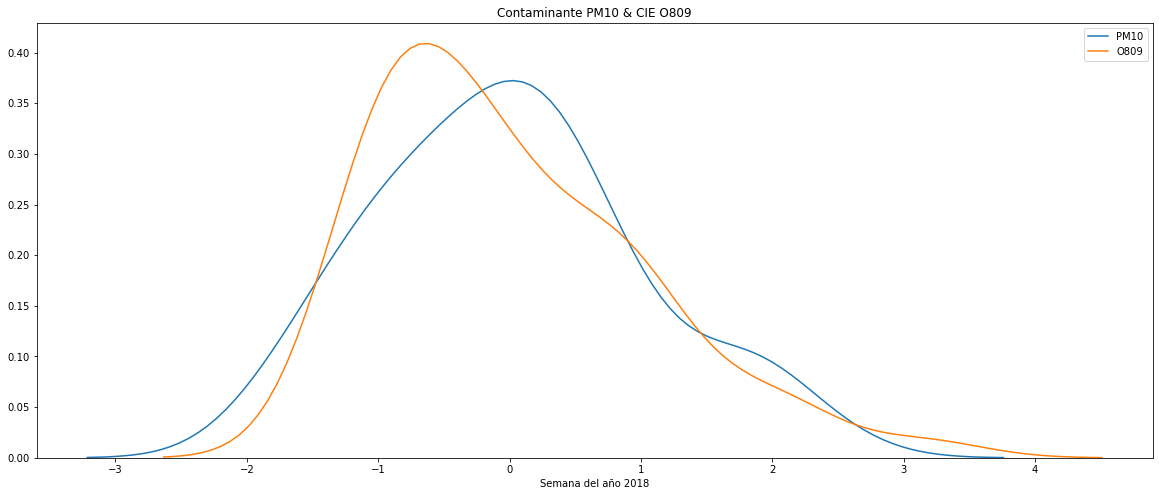


PM10 & O800


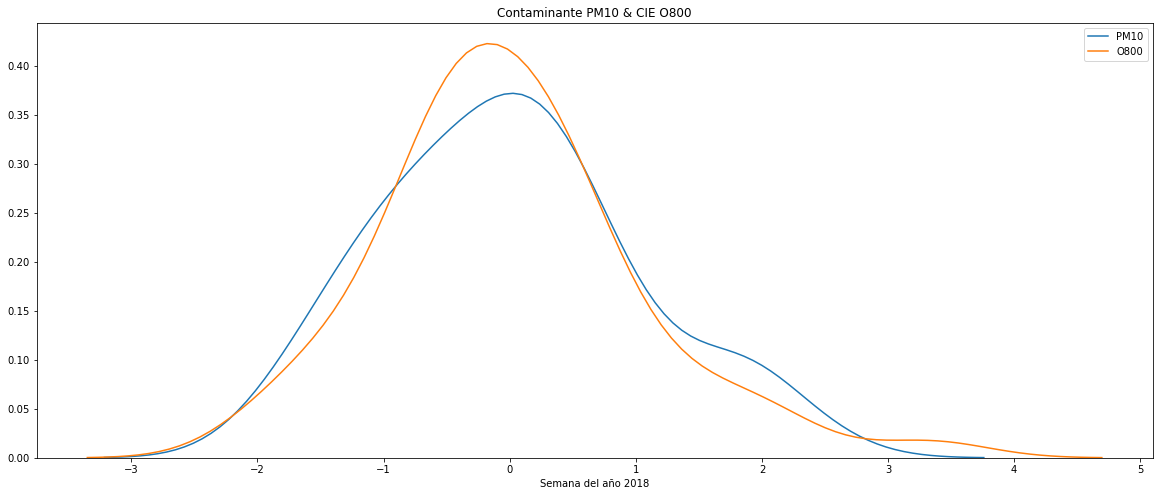


PM10 & O829


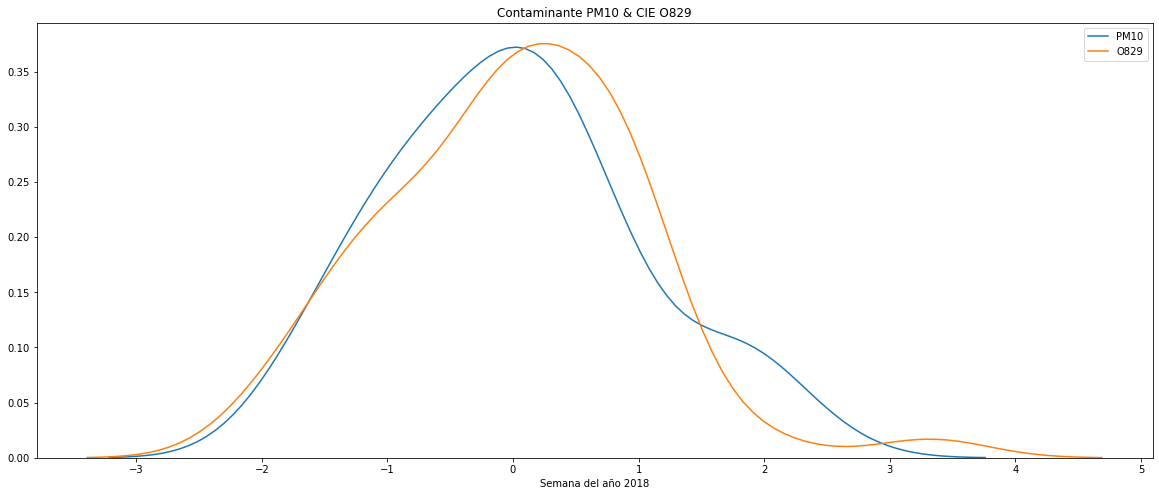


PM10 & N189


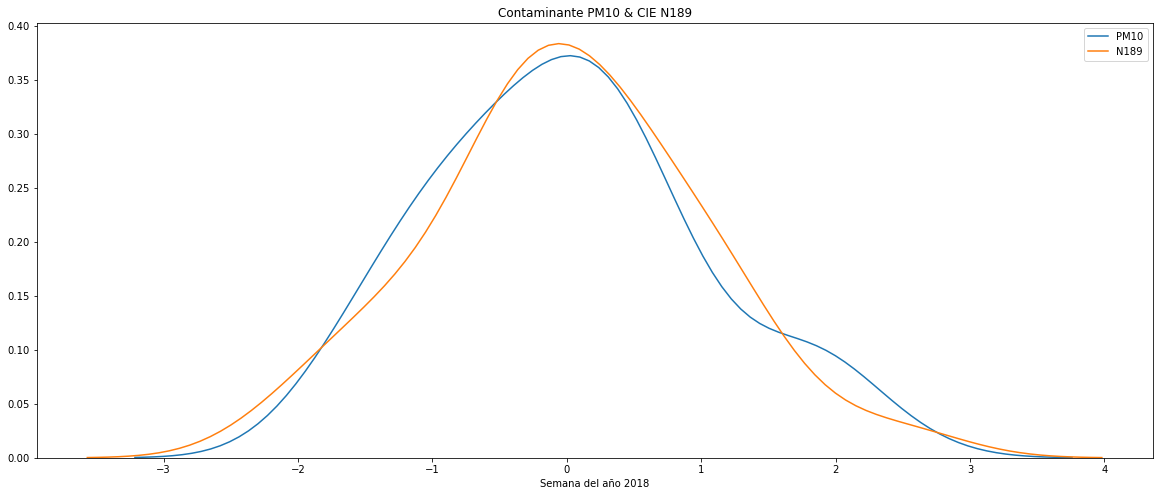


PM10 & O064


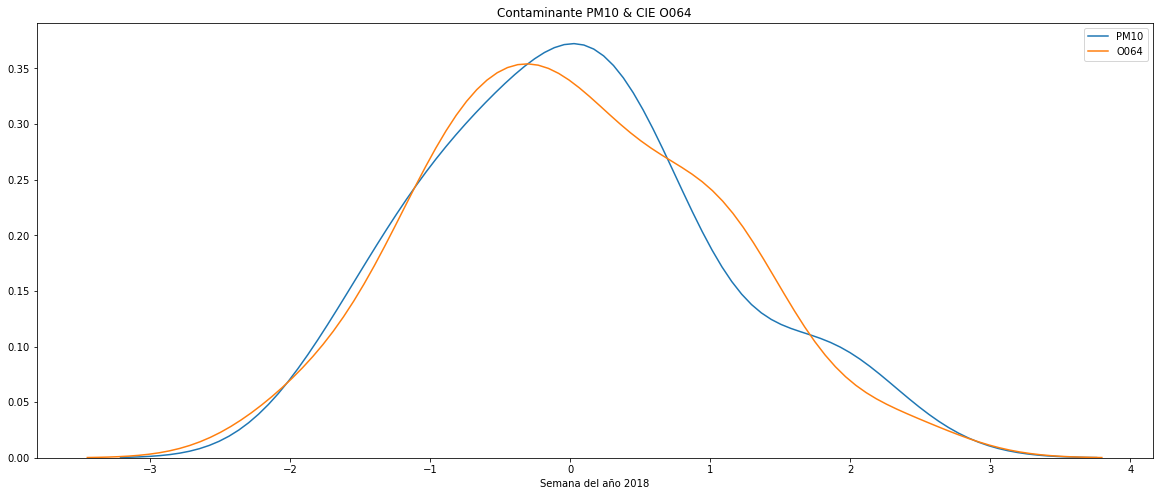


PM10 & C509


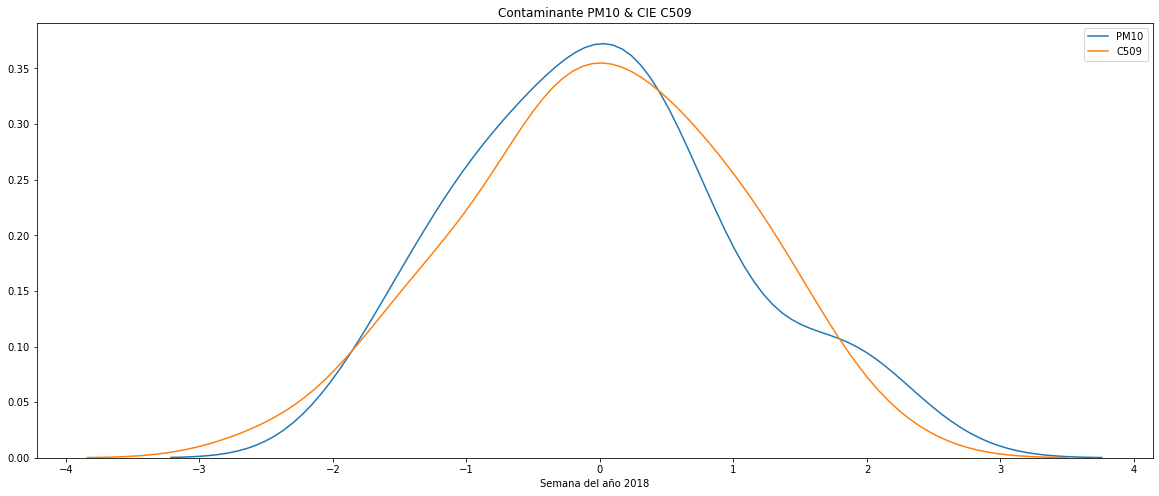


PM10 & O342


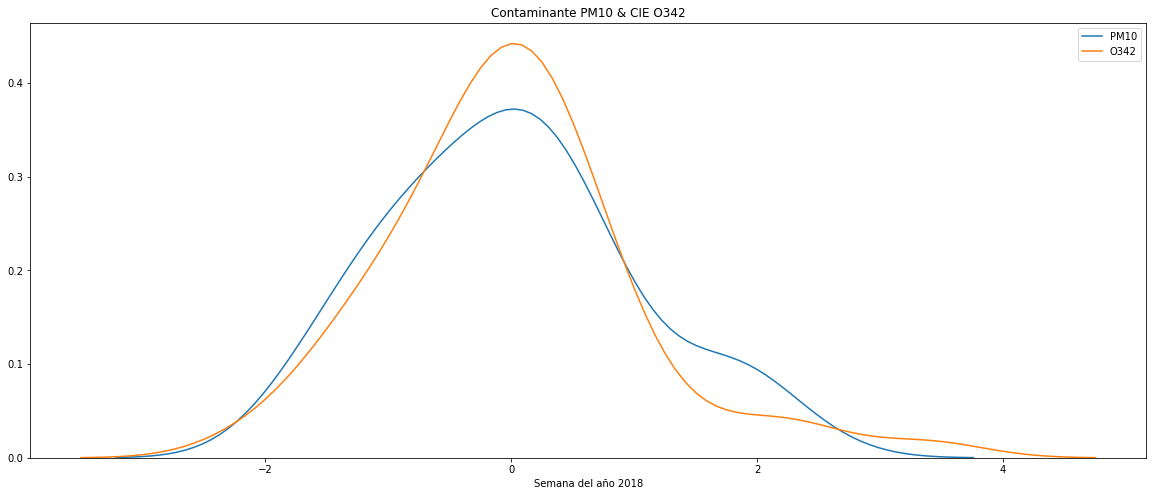


PM10 & H


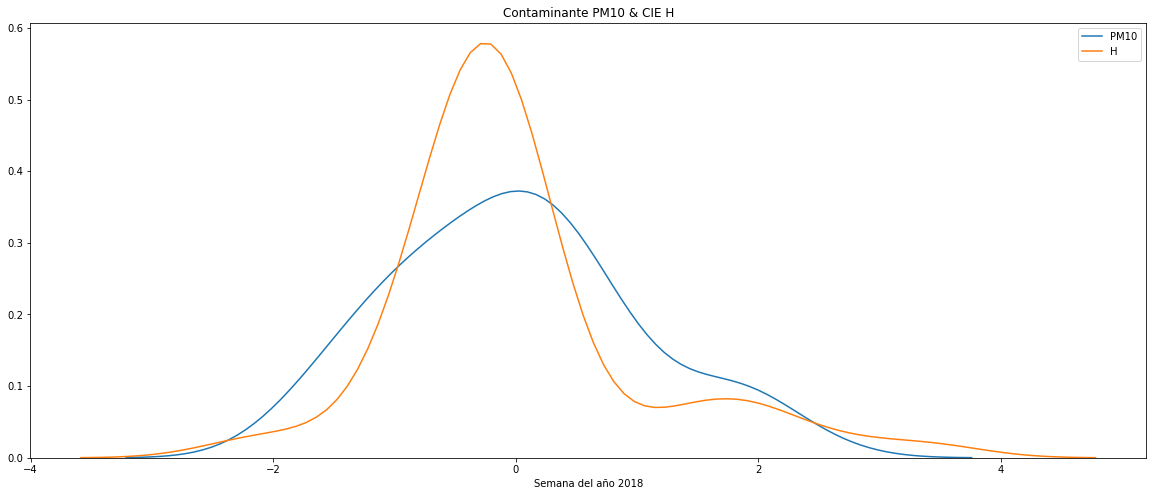


PM10 & I


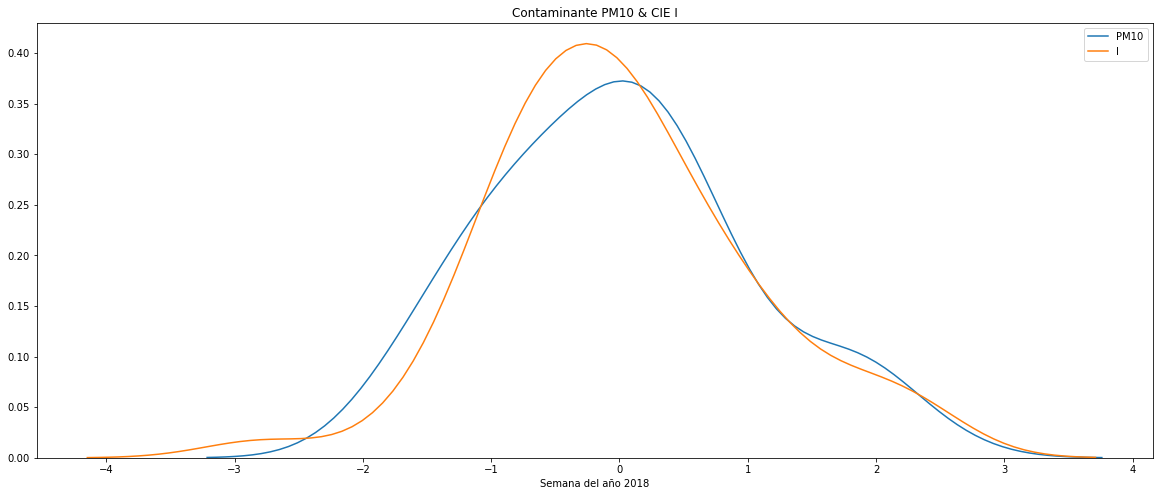


PM10 & J


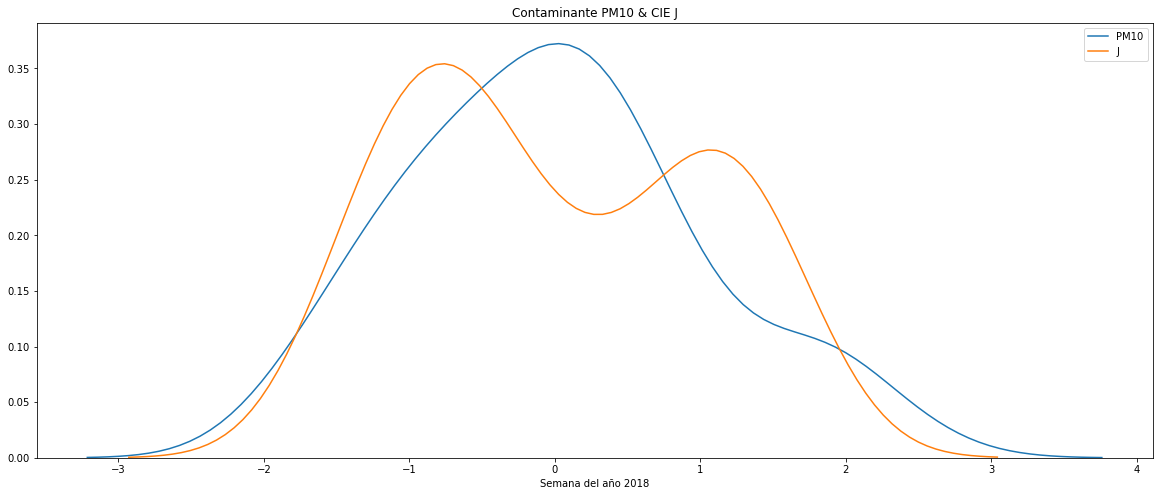

In [74]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1